## 1. IMPORT INDIVIDUAL DATASETS

In [316]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import random as rm
from datetime import datetime
from sklearn.cross_validation import train_test_split,StratifiedKFold,KFold,cross_val_score
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, classification_report
from scipy import interp
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams
from __future__ import division

In [317]:
%cd "C:\Users\raviteja\Desktop\MSBAPM\Baseball-Hall of Fame Predictions\Fielder\baseball-collection of 27 datasets"

C:\Users\raviteja\Desktop\MSBAPM\Baseball-Hall of Fame Predictions\Fielder\baseball-collection of 27 datasets


### Master

In [318]:
master=pd.read_csv('Master.csv')

In [319]:
master.columns=[u'playerID_MAS', u'birthYear_MAS', u'birthMonth_MAS', u'birthDay_MAS', u'birthCountry_MAS',
       u'birthState_MAS', u'birthCity_MAS', u'deathYear_MAS', u'deathMonth_MAS', u'deathDay_MAS',
       u'deathCountry_MAS', u'deathState_MAS', u'deathCity_MAS', u'nameFirst_MAS', u'nameLast_MAS',
       u'nameGiven_MAS', u'weight_MAS', u'height_MAS', u'bats_MAS', u'throws_MAS', u'debut_MAS',
       u'finalGame_MAS', u'retroID_MAS', u'bbrefID_MAS']

In [320]:
master.set_index('playerID_MAS',inplace=True)

### Awards

In [321]:
awards=pd.read_csv('AwardsPlayers.csv')

In [322]:
awards=pd.pivot_table(awards[['playerID','awardID']].dropna(),index='playerID',columns='awardID',aggfunc=len)

In [323]:
awards.columns=[u'ALCS MVP_AW', u'All-Star Game MVP_AW', u'Babe Ruth Award_AW',
       u'Baseball Magazine All-Star_AW', u'Branch Rickey Award_AW',
       u'Comeback Player of the Year_AW', u'Cy Young Award_AW', u'Gold Glove_AW',
       u'Hank Aaron Award_AW', u'Hutch Award_AW', u'Lou Gehrig Memorial Award_AW',
       u'Most Valuable Player_AW', u'NLCS MVP_AW', u'Pitching Triple Crown_AW',
       u'Roberto Clemente Award_AW', u'Rolaids Relief Man Award_AW',
       u'Rookie of the Year_AW', u'Silver Slugger_AW', u'TSN All-Star_AW',
       u'TSN Fireman of the Year_AW', u'TSN Guide MVP_AW',
       u'TSN Major League Player of the Year_AW', u'TSN Pitcher of the Year_AW',
       u'TSN Player of the Year_AW', u'TSN Reliever of the Year_AW', u'Triple Crown_AW',
       u'World Series MVP_AW']

### Appearances

In [324]:
appearances=pd.read_csv('Appearances.csv')

In [325]:
app_leagues=pd.pivot_table(appearances[['playerID','lgID']].dropna(),index='playerID',columns='lgID',aggfunc=len)

In [326]:
x=appearances.iloc[:,3:].groupby(by='playerID').sum()

In [327]:
appearances=pd.concat([app_leagues,x],axis=1)

In [328]:
appearances.columns=[u'AA_AP', u'AL_AP', u'FL_AP', u'NL_AP', u'PL_AP', u'UA_AP', u'G_all_AP', u'GS_AP', u'G_batting_AP',
       u'G_defense_AP', u'G_p_AP', u'G_c_AP', u'G_1b_AP', u'G_2b_AP', u'G_3b_AP', u'G_ss_AP',
       u'G_lf_AP', u'G_cf_AP', u'G_rf_AP', u'G_of_AP', u'G_dh_AP', u'G_ph_AP', u'G_pr_AP']

### HallOfFame

In [329]:
halloffame=pd.read_csv('HallOfFame.csv')

In [330]:
halloffame

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226,170,222,Y,Player,NaN
1,ruthba01,1936,BBWAA,226,170,215,Y,Player,NaN
2,wagneho01,1936,BBWAA,226,170,215,Y,Player,NaN
3,mathech01,1936,BBWAA,226,170,205,Y,Player,NaN
4,johnswa01,1936,BBWAA,226,170,189,Y,Player,NaN
5,lajoina01,1936,BBWAA,226,170,146,N,Player,NaN
6,speaktr01,1936,BBWAA,226,170,133,N,Player,NaN
7,youngcy01,1936,BBWAA,226,170,111,N,Player,NaN
8,hornsro01,1936,BBWAA,226,170,105,N,Player,NaN
9,cochrmi01,1936,BBWAA,226,170,80,N,Player,NaN


In [331]:
halloffame_all=halloffame[(halloffame.category=='Player')&(halloffame.votedBy=='BBWAA')][['playerID','yearid','votedBy','ballots','needed','votes','inducted']]

In [332]:
halloffame_all.columns=['playerID_HOF',u'yearid_HOF', u'votedBy_HOF', u'ballots_HOF', u'needed_HOF', u'votes_HOF', u'inducted_HOF']

In [333]:
halloffame_all.set_index('playerID_HOF',inplace=True)

In [334]:
halloffame=halloffame_all[halloffame_all.inducted_HOF=='Y']

### Salaries

In [335]:
salaries=pd.read_csv('Salaries.csv')

In [336]:
salaries=pd.groupby(salaries[['playerID','salary']],by='playerID').mean()

In [337]:
salaries.columns=['salary_SAL']

### Batting

In [338]:
batting=pd.read_csv('Batting.csv')

In [339]:
batting=batting.groupby(by='playerID').sum()

In [340]:
batting=batting.drop(['yearID','stint'],axis=1)

In [341]:
batting.columns=[u'G_BAT', u'AB_BAT', u'R_BAT', u'H_BAT', u'2B_BAT', u'3B_BAT', u'HR_BAT', u'RBI_BAT', u'SB_BAT', u'CS_BAT',
       u'BB_BAT', u'SO_BAT', u'IBB_BAT', u'HBP_BAT', u'SH_BAT', u'SF_BAT', u'GIDP_BAT']

### Pitching

In [342]:
pitching=pd.read_csv('Pitching.csv')

In [343]:
pitching=pitching.groupby(by='playerID').sum()

In [344]:
pitching=pitching.drop(['yearID','stint'],axis=1)

In [345]:
pitching.columns=[u'W_PIT', u'L_PIT', u'G_PIT', u'GS_PIT', u'CG_PIT', u'SHO_PIT', u'SV_PIT', u'IPouts_PIT', u'H_PIT', u'ER_PIT',
       u'HR_PIT', u'BB_PIT', u'SO_PIT', u'BAOpp_PIT', u'ERA_PIT', u'IBB_PIT', u'WP_PIT', u'HBP_PIT', u'BK_PIT',
       u'BFP_PIT', u'GF_PIT', u'R_PIT', u'SH_PIT', u'SF_PIT', u'GIDP_PIT']

### Fielding

In [346]:
fielding=pd.read_csv('Fielding.csv')

In [347]:
fielding=fielding.groupby(by='playerID').sum()

In [348]:
fielding=fielding.drop(['yearID','stint'],axis=1)

In [349]:
fielding.columns=[u'G_FIE', u'GS_FIE', u'InnOuts_FIE', u'PO_FIE', u'A_FIE', u'E_FIE', u'DP_FIE', u'PB_FIE', u'WP_FIE', u'SB_FIE',
       u'CS_FIE', u'ZR_FIE']

# 2. MERGE THE DATASETS

In [350]:
x=master.merge(salaries,how='left',left_index=True,right_index=True)

In [351]:
x=x.merge(awards,how='left',left_index=True,right_index=True)

In [352]:
x=x.merge(appearances,how='left',left_index=True,right_index=True)

In [353]:
x=x.merge(batting,how='left',left_index=True,right_index=True)

In [354]:
x=x.merge(pitching,how='left',left_index=True,right_index=True)

In [355]:
x=x.merge(fielding,how='left',left_index=True,right_index=True)

In [356]:
baseball=x.merge(halloffame,how='left',left_index=True,right_index=True)

In [357]:
baseball.to_csv("baseball_merged_dataset.csv")

# 3. EXPLORATORY DATA ANALYSIS

### Remove unnecessary variables

In [358]:
baseball=pd.read_csv('baseball_merged_dataset.csv',index_col='playerID_MAS')

In [359]:
baseball.shape

(18846, 134)

In [360]:
baseball.inducted_HOF.value_counts()

Y    116
Name: inducted_HOF, dtype: int64

In [361]:
baseball.index.name='Player_ID'

In [362]:
baseball.drop([u'birthYear_MAS', u'birthMonth_MAS', u'birthDay_MAS',
       u'birthCountry_MAS', u'birthState_MAS', u'birthCity_MAS', u'deathYear_MAS',
       u'deathMonth_MAS', u'deathDay_MAS',u'deathCountry_MAS', u'deathState_MAS', u'deathCity_MAS',
       u'nameFirst_MAS', u'nameLast_MAS', u'nameGiven_MAS',u'bats_MAS', u'throws_MAS',u'retroID_MAS', u'bbrefID_MAS','salary_SAL'
              ,'yearid_HOF','votedBy_HOF','ballots_HOF','needed_HOF','votes_HOF'],axis=1,inplace=True)

### Impute missing values

In [363]:
for i in baseball.columns:
    if re.search("AP",i):
        baseball[i].fillna(0,inplace=True)

In [364]:
for i in baseball.columns:
    if re.search("AW",i):
        baseball[i].fillna(0,inplace=True)

In [365]:
for i in baseball.columns:
    if re.search("BAT",i):
        baseball[i].fillna(0,inplace=True)

In [366]:
for i in baseball.columns:
    if re.search("PIT",i):
        baseball[i].fillna(0,inplace=True)

In [367]:
for i in baseball.columns:
    if re.search("FIE",i):
        baseball[i].fillna(0,inplace=True)

In [368]:
def getcolinfo():
    global mastercol
    global awardscol
    global salariescol
    global halloffamecol
    global collegecol
    global battingcol
    global pitchingcol
    global fieldingcol
    global appearancescol
    mastercol=[]
    awardscol=[]
    halloffamecol=[]
    battingcol=[]
    pitchingcol=[]
    fieldingcol=[]
    appearancescol=[]
    for i in baseball.columns:
        if re.search("MAS",i):
            mastercol.append(i)
        elif re.search("AW",i):
            awardscol.append(i)
        elif re.search("HOF",i):
            halloffamecol.append(i)
        elif re.search("BAT",i):
            battingcol.append(i)
        elif re.search("PIT",i):
            pitchingcol.append(i)
        elif re.search("FIE",i):
            fieldingcol.append(i)
        elif re.search("AP",i):
            appearancescol.append(i)

In [369]:
getcolinfo()

In [370]:
baseball.inducted_HOF.fillna('N',inplace=True)

In [371]:
baseball.weight_MAS.fillna(baseball.weight_MAS.mode()[0],inplace=True)

In [372]:
baseball.height_MAS.fillna(baseball.height_MAS.mode()[0],inplace=True)

In [373]:
baseball.debut_MAS=baseball.debut_MAS.str[0:4]

In [374]:
baseball.finalGame_MAS=baseball.finalGame_MAS.str[0:4]

In [375]:
baseball.debut_MAS.fillna(-1,inplace=True)

In [376]:
baseball.finalGame_MAS.fillna(-1,inplace=True)

In [377]:
baseball.inducted_HOF.fillna(0,inplace=True)

# 4. ELLIGIBLE HALL OF FAMERS

In [378]:
#Years in Hall of Fame ballot<=10
years_in_ballot=halloffame_all[['yearid_HOF']].groupby(halloffame_all.index).count()
years_in_ballot=years_in_ballot<=10

In [379]:
#Years in MLB>=10
appearances1=pd.read_csv('Appearances.csv')
appearances1=appearances1.set_index('playerID')
appearances1=DataFrame(appearances1[['yearID']].groupby(appearances1.index).yearID.nunique())>=10

In [380]:
#Minimum votes in ballot
ballot_percent=DataFrame((halloffame_all.votes_HOF/halloffame_all.ballots_HOF)*100)
player_ballot_percentage=(ballot_percent<75)&(ballot_percent>=5)
min_vote_criteria=player_ballot_percentage.groupby(player_ballot_percentage.index).all()

In [381]:
#Retired prior to 5 years
player_retirement=(DataFrame(datetime.now().year-baseball.finalGame_MAS.astype('float'))>=5) & \
(DataFrame(datetime.now().year-baseball.finalGame_MAS.astype('float'))<=20)

In [382]:
player_retirement

,finalGame_MAS
Player_ID,
aardsda01,False
aaronha01,False
aaronto01,False
aasedo01,False
abadan01,True
abadfe01,False
abadijo01,False
abbated01,False
abbeybe01,False


In [383]:
appearances1.columns=['10_MLB']

In [384]:
player_retirement.columns=['Player_Retirement']

In [385]:
years_in_ballot.columns=['years_in_ballot']

In [386]:
min_vote_criteria.columns=['Min_Vote_Criteria']

In [387]:
elligibility=pd.merge(appearances1,player_retirement,left_index=True,right_index=True)

In [388]:
elligibility=pd.merge(elligibility,years_in_ballot,how='left',left_index=True,right_index=True)

In [389]:
elligibility=pd.merge(elligibility,min_vote_criteria,how='left',left_index=True,right_index=True)

In [390]:
elligibility=elligibility.fillna(True,axis=1)

In [391]:
elligibility1=elligibility.all(axis=1)

In [392]:
elligibility1=DataFrame(elligibility1,columns=['HOF_Eligibility'])

In [393]:
baseball=pd.merge(baseball,elligibility1,how='left',left_index=True,right_index=True)

In [394]:
new_data={True:'Elligible',False:'Not Elligible'}
baseball['HOF_Eligibility']=baseball.HOF_Eligibility.map(new_data)

In [395]:
baseball.HOF_Eligibility.fillna('Not_Elligible',inplace=True)

In [396]:
baseball.drop([u'debut_MAS', u'finalGame_MAS'],axis=1,inplace=True)

In [397]:
baseball[battingcol].columns

Index([u'G_BAT', u'AB_BAT', u'R_BAT', u'H_BAT', u'2B_BAT', u'3B_BAT',
       u'HR_BAT', u'RBI_BAT', u'SB_BAT', u'CS_BAT', u'BB_BAT', u'SO_BAT',
       u'IBB_BAT', u'HBP_BAT', u'SH_BAT', u'SF_BAT', u'GIDP_BAT'],
      dtype='object')

# FEAUTURE ENGINEERING

#### Batting

In [398]:
baseball['AB/HR_BAT']=baseball.AB_BAT/baseball.HR_BAT
baseball['BA_BAT']=baseball.H_BAT/baseball.AB_BAT
baseball['OBP_BAT']=(baseball.H_BAT+baseball.BB_BAT+baseball.HBP_BAT)/(baseball.AB_BAT+baseball.BB_BAT+baseball.HBP_BAT+baseball.SF_BAT)
baseball['BB/SO_BAT']=baseball.BB_BAT/baseball.SO_BAT
baseball['TB_BAT']=baseball['H_BAT']+baseball['2B_BAT']+2*baseball['3B_BAT']+3*baseball['HR_BAT']
baseball['TOB_BAT']=baseball.H_BAT+baseball.BB_BAT+baseball.HBP_BAT
baseball['TA_BAT']=(baseball.TB_BAT+baseball.BB_BAT+baseball.HBP_BAT+baseball.SB_BAT-baseball.CS_BAT)/(baseball.AB_BAT-baseball.H_BAT+baseball.CS_BAT+baseball.GIDP_BAT)
baseball['XBH_BAT']=baseball['2B_BAT']+baseball['3B_BAT']+baseball['HR_BAT']
baseball['SBA/ATT_BAT']=baseball.SB_BAT+baseball.CS_BAT

In [399]:
baseball.replace([np.inf, -np.inf], 5000,inplace=True)

#### Pitching

In [400]:
baseball['BB/9_PIT']=baseball.BB_PIT/9
baseball['SO/9_PIT']=baseball.SO_PIT/9

In [401]:
baseball[pitchingcol].columns

Index([u'W_PIT', u'L_PIT', u'G_PIT', u'GS_PIT', u'CG_PIT', u'SHO_PIT',
       u'SV_PIT', u'IPouts_PIT', u'H_PIT', u'ER_PIT', u'HR_PIT', u'BB_PIT',
       u'SO_PIT', u'BAOpp_PIT', u'ERA_PIT', u'IBB_PIT', u'WP_PIT', u'HBP_PIT',
       u'BK_PIT', u'BFP_PIT', u'GF_PIT', u'R_PIT', u'SH_PIT', u'SF_PIT',
       u'GIDP_PIT'],
      dtype='object')

In [402]:
baseball.columns

Index([u'weight_MAS', u'height_MAS', u'ALCS MVP_AW', u'All-Star Game MVP_AW',
       u'Babe Ruth Award_AW', u'Baseball Magazine All-Star_AW',
       u'Branch Rickey Award_AW', u'Comeback Player of the Year_AW',
       u'Cy Young Award_AW', u'Gold Glove_AW',
       ...
       u'BA_BAT', u'OBP_BAT', u'BB/SO_BAT', u'TB_BAT', u'TOB_BAT', u'TA_BAT',
       u'XBH_BAT', u'SBA/ATT_BAT', u'BB/9_PIT', u'SO/9_PIT'],
      dtype='object', length=119)

In [403]:
getcolinfo()

In [404]:
baseball.to_csv('baseball_mdl_rdy_not_ndim.csv')

#### Awards

In [405]:
awardscol

['ALCS MVP_AW',
 'All-Star Game MVP_AW',
 'Babe Ruth Award_AW',
 'Baseball Magazine All-Star_AW',
 'Branch Rickey Award_AW',
 'Comeback Player of the Year_AW',
 'Cy Young Award_AW',
 'Gold Glove_AW',
 'Hank Aaron Award_AW',
 'Hutch Award_AW',
 'Lou Gehrig Memorial Award_AW',
 'Most Valuable Player_AW',
 'NLCS MVP_AW',
 'Pitching Triple Crown_AW',
 'Roberto Clemente Award_AW',
 'Rolaids Relief Man Award_AW',
 'Rookie of the Year_AW',
 'Silver Slugger_AW',
 'TSN All-Star_AW',
 'TSN Fireman of the Year_AW',
 'TSN Guide MVP_AW',
 'TSN Major League Player of the Year_AW',
 'TSN Pitcher of the Year_AW',
 'TSN Player of the Year_AW',
 'TSN Reliever of the Year_AW',
 'Triple Crown_AW',
 'World Series MVP_AW']

In [406]:
baseball['Character_Award_AW']=baseball['Branch Rickey Award_AW']+baseball['Hutch Award_AW']+\
baseball['Lou Gehrig Memorial Award_AW']+baseball['Roberto Clemente Award_AW']

In [407]:
baseball['Performance_Award_AW']=baseball['ALCS MVP_AW']+baseball['All-Star Game MVP_AW']+baseball['Babe Ruth Award_AW']+\
baseball['Gold Glove_AW']+baseball['Hank Aaron Award_AW']+baseball['TSN Major League Player of the Year_AW']+\
baseball['Most Valuable Player_AW']+baseball['NLCS MVP_AW']\
+baseball['Rookie of the Year_AW']+baseball['Silver Slugger_AW']+\
baseball['Triple Crown_AW']+baseball['World Series MVP_AW']

In [408]:
baseball.drop(awardscol,axis=1,inplace=True)

In [409]:
getcolinfo()

In [410]:
baseball.columns

Index([u'weight_MAS', u'height_MAS', u'AA_AP', u'AL_AP', u'FL_AP', u'NL_AP',
       u'PL_AP', u'UA_AP', u'G_all_AP', u'GS_AP', u'G_batting_AP',
       u'G_defense_AP', u'G_p_AP', u'G_c_AP', u'G_1b_AP', u'G_2b_AP',
       u'G_3b_AP', u'G_ss_AP', u'G_lf_AP', u'G_cf_AP', u'G_rf_AP', u'G_of_AP',
       u'G_dh_AP', u'G_ph_AP', u'G_pr_AP', u'G_BAT', u'AB_BAT', u'R_BAT',
       u'H_BAT', u'2B_BAT', u'3B_BAT', u'HR_BAT', u'RBI_BAT', u'SB_BAT',
       u'CS_BAT', u'BB_BAT', u'SO_BAT', u'IBB_BAT', u'HBP_BAT', u'SH_BAT',
       u'SF_BAT', u'GIDP_BAT', u'W_PIT', u'L_PIT', u'G_PIT', u'GS_PIT',
       u'CG_PIT', u'SHO_PIT', u'SV_PIT', u'IPouts_PIT', u'H_PIT', u'ER_PIT',
       u'HR_PIT', u'BB_PIT', u'SO_PIT', u'BAOpp_PIT', u'ERA_PIT', u'IBB_PIT',
       u'WP_PIT', u'HBP_PIT', u'BK_PIT', u'BFP_PIT', u'GF_PIT', u'R_PIT',
       u'SH_PIT', u'SF_PIT', u'GIDP_PIT', u'G_FIE', u'GS_FIE', u'InnOuts_FIE',
       u'PO_FIE', u'A_FIE', u'E_FIE', u'DP_FIE', u'PB_FIE', u'WP_FIE',
       u'SB_FIE', u'CS_FIE', u'ZR_

# 5. DIMENSIONALITY REDUCTION

#### Hitting Statistics

In [411]:
baseball[battingcol].corr()

,G_BAT,AB_BAT,R_BAT,H_BAT,2B_BAT,3B_BAT,HR_BAT,RBI_BAT,SB_BAT,CS_BAT,...,GIDP_BAT,AB/HR_BAT,BA_BAT,OBP_BAT,BB/SO_BAT,TB_BAT,TOB_BAT,TA_BAT,XBH_BAT,SBA/ATT_BAT
G_BAT,1.000000,0.965756,0.933386,0.954425,0.937058,0.782955,0.761301,0.922797,0.661346,0.722342,...,0.791537,-0.524791,0.277260,0.276801,-0.140394,0.947177,0.953927,-0.050070,0.922726,0.713399
AB_BAT,0.965756,1.000000,0.978800,0.995074,0.975568,0.835845,0.782841,0.960413,0.710974,0.740757,...,0.797733,-0.517245,0.307572,0.305553,-0.103713,0.986053,0.990670,-0.046150,0.959966,0.758236
R_BAT,0.933386,0.978800,1.000000,0.985978,0.969018,0.860520,0.796891,0.962431,0.756933,0.730457,...,0.743234,-0.475157,0.297106,0.300083,-0.098134,0.983751,0.989449,-0.040892,0.964655,0.793111
H_BAT,0.954425,0.995074,0.985978,1.000000,0.982356,0.853276,0.782748,0.966985,0.718148,0.738730,...,0.785495,-0.494750,0.307543,0.304672,-0.100721,0.991030,0.994128,-0.042796,0.966237,0.763578
2B_BAT,0.937058,0.975568,0.969018,0.982356,1.000000,0.806222,0.820282,0.971302,0.660873,0.723208,...,0.808248,-0.483282,0.298835,0.298400,-0.107155,0.987087,0.980064,-0.040855,0.983518,0.713224
3B_BAT,0.782955,0.835845,0.860520,0.853276,0.806222,1.000000,0.493553,0.792019,0.770235,0.604818,...,0.427987,-0.409345,0.268398,0.260984,-0.062494,0.818784,0.836053,-0.035344,0.780309,0.773399
HR_BAT,0.761301,0.782841,0.796891,0.782748,0.820282,0.493553,1.000000,0.884673,0.393217,0.558520,...,0.819522,-0.364573,0.213148,0.226862,-0.093719,0.856865,0.808294,-0.028799,0.901995,0.455522
RBI_BAT,0.922797,0.960413,0.962431,0.966985,0.971302,0.792019,0.884673,1.000000,0.624637,0.659891,...,0.798946,-0.467460,0.288279,0.290768,-0.101771,0.986948,0.970393,-0.039489,0.988304,0.668368
SB_BAT,0.661346,0.710974,0.756933,0.718148,0.660873,0.770235,0.393217,0.624637,1.000000,0.707136,...,0.362545,-0.322133,0.209129,0.209814,-0.046029,0.678247,0.713108,-0.027676,0.628738,0.985128
CS_BAT,0.722342,0.740757,0.730457,0.738730,0.723208,0.604818,0.558520,0.659891,0.707136,1.000000,...,0.624726,-0.354464,0.217358,0.219850,-0.103372,0.726081,0.739680,-0.029919,0.701724,0.818111


In [412]:
baseball.drop(['AB_BAT','R_BAT','H_BAT','2B_BAT','RBI_BAT','BB_BAT','SO_BAT',\
               'HBP_BAT','SF_BAT','GIDP_BAT','G_BAT',\
'SB_BAT','IBB_BAT','CS_BAT','OBP_BAT',\
'3B_BAT','HR_BAT','TA_BAT','BB/SO_BAT','XBH_BAT'],axis=1,inplace=True)

#### Pitching Statistics

In [413]:
baseball[pitchingcol].corr()

,W_PIT,L_PIT,G_PIT,GS_PIT,CG_PIT,SHO_PIT,SV_PIT,IPouts_PIT,H_PIT,ER_PIT,...,HBP_PIT,BK_PIT,BFP_PIT,GF_PIT,R_PIT,SH_PIT,SF_PIT,GIDP_PIT,BB/9_PIT,SO/9_PIT
W_PIT,1.000000,0.959714,0.784120,0.962950,0.820400,0.879492,0.252589,0.990107,0.981188,0.961257,...,0.838190,0.609679,0.964937,0.376701,0.962740,0.337968,0.335741,0.134406,0.935481,0.931332
L_PIT,0.959714,1.000000,0.811924,0.956051,0.785616,0.820298,0.274208,0.985801,0.987580,0.984605,...,0.854465,0.625812,0.964131,0.415796,0.982636,0.341608,0.343907,0.133310,0.957816,0.915080
G_PIT,0.784120,0.811924,1.000000,0.676952,0.492653,0.560889,0.599786,0.807130,0.799329,0.813068,...,0.739170,0.604074,0.813757,0.795418,0.786101,0.396429,0.408657,0.149419,0.820001,0.820204
GS_PIT,0.962950,0.956051,0.676952,1.000000,0.776161,0.858014,0.103243,0.969539,0.966954,0.963181,...,0.833546,0.625698,0.951245,0.200924,0.955571,0.372228,0.370646,0.155600,0.925630,0.917266
CG_PIT,0.820400,0.785616,0.492653,0.776161,1.000000,0.857547,0.073609,0.816979,0.816057,0.743889,...,0.618746,0.289894,0.730510,0.150205,0.820104,0.002267,-0.003045,-0.014942,0.718891,0.630983
SHO_PIT,0.879492,0.820298,0.560889,0.858014,0.857547,1.000000,0.090049,0.864518,0.841603,0.788671,...,0.689008,0.458378,0.843260,0.169902,0.803104,0.079307,0.071230,0.017271,0.785171,0.773359
SV_PIT,0.252589,0.274208,0.599786,0.103243,0.073609,0.090049,1.000000,0.258166,0.241986,0.243400,...,0.236289,0.218551,0.268961,0.907336,0.226096,0.132561,0.127764,0.034450,0.277533,0.317147
IPouts_PIT,0.990107,0.985801,0.807130,0.969539,0.816979,0.864518,0.258166,1.000000,0.995590,0.982496,...,0.854756,0.625261,0.975395,0.396066,0.983509,0.337296,0.337831,0.132648,0.956492,0.933780
H_PIT,0.981188,0.987580,0.799329,0.966954,0.816057,0.841603,0.241986,0.995590,1.000000,0.988393,...,0.845877,0.613021,0.967167,0.385277,0.991696,0.340396,0.342755,0.128735,0.947930,0.910610
ER_PIT,0.961257,0.984605,0.813068,0.963181,0.743889,0.788671,0.243400,0.982496,0.988393,1.000000,...,0.855569,0.647944,0.964486,0.394010,0.986805,0.389882,0.397585,0.143365,0.966433,0.924621


In [414]:
baseball.drop(['L_PIT','G_PIT','GS_PIT','CG_PIT','SHO_PIT','IPouts_PIT','H_PIT','ER_PIT','HBP_PIT','BFP_PIT','R_PIT','W_PIT','SV_PIT','BB_PIT','SO_PIT','WP_PIT','SO/9_PIT','BK_PIT','SH_PIT'],axis=1,inplace=True)

#### Fielding Statistics

In [415]:
baseball[fieldingcol].corr()

,G_FIE,GS_FIE,InnOuts_FIE,PO_FIE,A_FIE,E_FIE,DP_FIE,PB_FIE,WP_FIE,SB_FIE,CS_FIE,ZR_FIE
G_FIE,1.000000,0.766667,0.856232,0.758638,0.513931,0.592072,0.533740,0.119437,0.140944,0.151271,0.155290,0.119633
GS_FIE,0.766667,1.000000,0.930609,0.583017,0.311620,0.307011,0.363594,0.038168,0.197773,0.161809,0.176861,0.170725
InnOuts_FIE,0.856232,0.930609,1.000000,0.638983,0.377250,0.320416,0.443315,0.045687,0.189845,0.207265,0.210785,0.160567
PO_FIE,0.758638,0.583017,0.638983,1.000000,0.374605,0.524159,0.689369,0.236283,0.276807,0.320341,0.321600,0.235080
A_FIE,0.513931,0.311620,0.377250,0.374605,1.000000,0.735441,0.794272,0.076735,0.033364,0.034864,0.037468,0.031944
E_FIE,0.592072,0.307011,0.320416,0.524159,0.735441,1.000000,0.569615,0.292816,0.058267,0.056775,0.059794,0.052680
DP_FIE,0.533740,0.363594,0.443315,0.689369,0.794272,0.569615,1.000000,0.025662,0.019722,0.018116,0.019357,0.017217
PB_FIE,0.119437,0.038168,0.045687,0.236283,0.076735,0.292816,0.025662,1.000000,0.325744,0.336987,0.342703,0.274148
WP_FIE,0.140944,0.197773,0.189845,0.276807,0.033364,0.058267,0.019722,0.325744,1.000000,0.841473,0.901461,0.829198
SB_FIE,0.151271,0.161809,0.207265,0.320341,0.034864,0.056775,0.018116,0.336987,0.841473,1.000000,0.966357,0.647046


In [416]:
baseball.drop(['GS_FIE','InnOuts_FIE','PO_FIE','E_FIE','DP_FIE','WP_FIE','CS_FIE','ZR_FIE'],axis=1,inplace=True)

In [417]:
baseball.to_csv('baseball_mdl_rdy.csv')

In [418]:
baseball.shape

(18846, 47)

In [419]:
baseball.dropna(inplace=True)

In [420]:
baseball.isnull().sum()

weight_MAS              0
height_MAS              0
AA_AP                   0
AL_AP                   0
FL_AP                   0
NL_AP                   0
PL_AP                   0
UA_AP                   0
G_all_AP                0
GS_AP                   0
G_batting_AP            0
G_defense_AP            0
G_p_AP                  0
G_c_AP                  0
G_1b_AP                 0
G_2b_AP                 0
G_3b_AP                 0
G_ss_AP                 0
G_lf_AP                 0
G_cf_AP                 0
G_rf_AP                 0
G_of_AP                 0
G_dh_AP                 0
G_ph_AP                 0
G_pr_AP                 0
SH_BAT                  0
HR_PIT                  0
BAOpp_PIT               0
ERA_PIT                 0
IBB_PIT                 0
GF_PIT                  0
SF_PIT                  0
GIDP_PIT                0
G_FIE                   0
A_FIE                   0
PB_FIE                  0
SB_FIE                  0
inducted_HOF            0
HOF_Eligibil

### Feature Scaling

In [421]:
new_data={'N':0,'Y':1}
baseball.inducted_HOF=baseball.inducted_HOF.map(new_data)

In [422]:
new_data={'Not Elligible':0,'Elligible':1}
baseball.HOF_Eligibility=baseball.HOF_Eligibility.map(new_data)

In [423]:
baseball.columns

Index([u'weight_MAS', u'height_MAS', u'AA_AP', u'AL_AP', u'FL_AP', u'NL_AP',
       u'PL_AP', u'UA_AP', u'G_all_AP', u'GS_AP', u'G_batting_AP',
       u'G_defense_AP', u'G_p_AP', u'G_c_AP', u'G_1b_AP', u'G_2b_AP',
       u'G_3b_AP', u'G_ss_AP', u'G_lf_AP', u'G_cf_AP', u'G_rf_AP', u'G_of_AP',
       u'G_dh_AP', u'G_ph_AP', u'G_pr_AP', u'SH_BAT', u'HR_PIT', u'BAOpp_PIT',
       u'ERA_PIT', u'IBB_PIT', u'GF_PIT', u'SF_PIT', u'GIDP_PIT', u'G_FIE',
       u'A_FIE', u'PB_FIE', u'SB_FIE', u'inducted_HOF', u'HOF_Eligibility',
       u'AB/HR_BAT', u'BA_BAT', u'TB_BAT', u'TOB_BAT', u'SBA/ATT_BAT',
       u'BB/9_PIT', u'Character_Award_AW', u'Performance_Award_AW'],
      dtype='object')

In [424]:
baseball.head()

,weight_MAS,height_MAS,AA_AP,AL_AP,FL_AP,NL_AP,PL_AP,UA_AP,G_all_AP,GS_AP,...,inducted_HOF,HOF_Eligibility,AB/HR_BAT,BA_BAT,TB_BAT,TOB_BAT,SBA/ATT_BAT,BB/9_PIT,Character_Award_AW,Performance_Award_AW
Player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,220,75,0,5,0,4,0,0,331,0,...,0,0,5000.000000,0.000000,0,0,0,20.333333,0,0
aaronha01,180,72,0,2,0,21,0,0,3298,288,...,1,0,16.376159,0.304998,6856,5205,313,0.000000,1,4
aaronto01,190,75,0,0,0,7,0,0,437,0,...,0,0,72.615385,0.228814,309,302,17,0.000000,0,0
aasedo01,190,75,0,11,0,2,0,0,448,0,...,0,0,5000.000000,0.000000,0,0,0,50.777778,0,0
abadan01,184,73,0,2,0,1,0,0,15,4,...,0,0,5000.000000,0.095238,2,6,1,0.000000,0,0


In [310]:
from sklearn import preprocessing
std_scle=preprocessing.StandardScaler().fit(baseball.drop(['HOF_Eligibility','inducted_HOF'],axis=1))
baseball_scaled=DataFrame(std_scle.transform(X=baseball.drop(['HOF_Eligibility','inducted_HOF'],axis=1),y=['HOF_Eligibility','inducted_HOF']),
         columns=[u'weight_MAS', u'height_MAS', u'ALCS MVP_AW', u'All-Star Game MVP_AW',
       u'Babe Ruth Award_AW', u'Baseball Magazine All-Star_AW',
       u'Branch Rickey Award_AW', u'Comeback Player of the Year_AW',
       u'Cy Young Award_AW', u'Gold Glove_AW', u'Hank Aaron Award_AW',
       u'Hutch Award_AW', u'Lou Gehrig Memorial Award_AW',
       u'Most Valuable Player_AW', u'NLCS MVP_AW', u'Pitching Triple Crown_AW',
       u'Roberto Clemente Award_AW', u'Rolaids Relief Man Award_AW',
       u'Rookie of the Year_AW', u'Silver Slugger_AW', u'TSN All-Star_AW',
       u'TSN Fireman of the Year_AW', u'TSN Guide MVP_AW',
       u'TSN Major League Player of the Year_AW',
       u'TSN Pitcher of the Year_AW', u'TSN Player of the Year_AW',
       u'TSN Reliever of the Year_AW', u'Triple Crown_AW',
       u'World Series MVP_AW', u'AA_AP', u'AL_AP', u'FL_AP', u'NL_AP',
       u'PL_AP', u'UA_AP', u'G_all_AP', u'GS_AP', u'G_batting_AP',
       u'G_defense_AP', u'G_p_AP', u'G_c_AP', u'G_1b_AP', u'G_2b_AP',
       u'G_3b_AP', u'G_ss_AP', u'G_lf_AP', u'G_cf_AP', u'G_rf_AP', u'G_of_AP',
       u'G_dh_AP', u'G_ph_AP', u'G_pr_AP', u'SH_BAT', u'HR_PIT', u'BAOpp_PIT',
       u'ERA_PIT', u'IBB_PIT', u'GF_PIT', u'SF_PIT', u'GIDP_PIT', u'G_FIE',
       u'A_FIE', u'PB_FIE', u'SB_FIE',
       u'AB/HR_BAT', u'BA_BAT', u'TB_BAT', u'TOB_BAT', u'SBA/ATT_BAT',
       u'BB/9_PIT'],index=baseball.index)

ValueError: Shape of passed values is (45, 16704), indices imply (70, 16704)

In [425]:
from sklearn import preprocessing
std_scle=preprocessing.StandardScaler().fit(baseball.drop(['HOF_Eligibility','inducted_HOF'],axis=1))
baseball_scaled=DataFrame(std_scle.transform(X=baseball.drop(['HOF_Eligibility','inducted_HOF'],axis=1),y=['HOF_Eligibility','inducted_HOF']),
         columns=[u'weight_MAS', u'height_MAS', u'AA_AP', u'AL_AP', u'FL_AP', u'NL_AP',
       u'PL_AP', u'UA_AP', u'G_all_AP', u'GS_AP', u'G_batting_AP',
       u'G_defense_AP', u'G_p_AP', u'G_c_AP', u'G_1b_AP', u'G_2b_AP',
       u'G_3b_AP', u'G_ss_AP', u'G_lf_AP', u'G_cf_AP', u'G_rf_AP', u'G_of_AP',
       u'G_dh_AP', u'G_ph_AP', u'G_pr_AP', u'SH_BAT', u'HR_PIT', u'BAOpp_PIT',
       u'ERA_PIT', u'IBB_PIT', u'GF_PIT', u'SF_PIT', u'GIDP_PIT', u'G_FIE',
       u'A_FIE', u'PB_FIE', u'SB_FIE',
       u'AB/HR_BAT', u'BA_BAT', u'TB_BAT', u'TOB_BAT', u'SBA/ATT_BAT',
       u'BB/9_PIT','Character_Award_AW','Performance_Award_AW'],index=baseball.index)

In [426]:
baseball.head()

,weight_MAS,height_MAS,AA_AP,AL_AP,FL_AP,NL_AP,PL_AP,UA_AP,G_all_AP,GS_AP,...,inducted_HOF,HOF_Eligibility,AB/HR_BAT,BA_BAT,TB_BAT,TOB_BAT,SBA/ATT_BAT,BB/9_PIT,Character_Award_AW,Performance_Award_AW
Player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,220,75,0,5,0,4,0,0,331,0,...,0,0,5000.000000,0.000000,0,0,0,20.333333,0,0
aaronha01,180,72,0,2,0,21,0,0,3298,288,...,1,0,16.376159,0.304998,6856,5205,313,0.000000,1,4
aaronto01,190,75,0,0,0,7,0,0,437,0,...,0,0,72.615385,0.228814,309,302,17,0.000000,0,0
aasedo01,190,75,0,11,0,2,0,0,448,0,...,0,0,5000.000000,0.000000,0,0,0,50.777778,0,0
abadan01,184,73,0,2,0,1,0,0,15,4,...,0,0,5000.000000,0.095238,2,6,1,0.000000,0,0


In [427]:
    baseball=pd.merge(baseball_scaled,baseball[['HOF_Eligibility','inducted_HOF']],how='inner',right_index=True,left_index=True)

In [428]:
baseball.shape

(16704, 47)

# 6. MODELLING-HITTERS/FIELDERS/PITCHER

In [429]:
baseball_elligible=baseball[baseball.HOF_Eligibility==1]

In [430]:
baseball_hof=baseball[baseball.inducted_HOF==1]

In [431]:
baseball_hof.shape

(116, 47)

In [432]:
baseball_elligible.drop('HOF_Eligibility',axis=1,inplace=True)

C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [433]:
baseball_hof.drop('HOF_Eligibility',axis=1,inplace=True)

C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [434]:
baseball_hof.shape

(116, 46)

In [435]:
baseball_elligible.shape

(526, 46)

In [436]:
baseball_elligible_all=baseball_elligible.append(baseball_hof)
baseball_elligible_all.to_csv('baseball_hof_elligible.csv')

In [437]:
baseball_elligible_all.shape

(642, 46)

In [438]:
baseball_elligible_all.inducted_HOF.value_counts()

0    526
1    116
Name: inducted_HOF, dtype: int64

In [439]:
baseball_elligible=baseball_elligible.sample(n=300,random_state=1)

In [440]:
mdl_rdy=baseball_elligible.append(baseball_hof)

In [441]:
mdl_rdy.shape

(416, 46)

In [442]:
x=mdl_rdy.drop(['inducted_HOF'],axis=1)

In [443]:
y=mdl_rdy.inducted_HOF

In [444]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

### Baseline Logistic Regression

MODEL METRICS
-------------
Model Accuracy(Train): 1.0
Model Accuracy(Test): 0.952095808383
Confusion Matrix(Train):
[[183   0]
 [  0  66]]
Confusion Matrix(Test):
[[113   4]
 [  4  46]]
True Positive Rate: 0.92
False Positive Rate: 0.034188034188
ROC AUC: 0.98


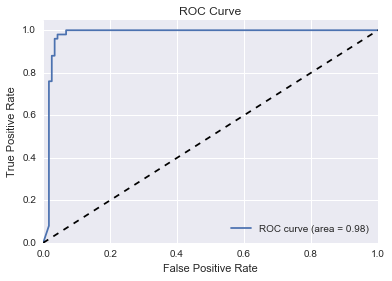

In [445]:
log_regression_all=LogisticRegression(penalty='l1')
log_regression_all.fit(X_train,y_train)

t1=log_regression_all.predict(X_train)
t=log_regression_all.predict(X_test)
#print classification_report(y_test,t)
print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",accuracy_score(y_train,t1)
print "Model Accuracy(Test):",accuracy_score(y_test,t)
print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)
x=confusion_matrix(y_test,t)
tpr=x[1,1]/(x[1,0]+x[1,1])
fpr=x[0,1]/(x[0,0]+x[0,1])
print "True Positive Rate:",tpr
print "False Positive Rate:",fpr


fpr, tpr, _ =metrics.roc_curve(y_test,log_regression_all.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [446]:
coeffecients1=DataFrame(zip(X_train.columns,log_regression_all.coef_.flatten()),columns=['Variable','Coeffecient'])
imp_coefficients=coeffecients1[coeffecients1.Coeffecient<>0]
imp_coefficients.sort_values(by='Coeffecient',ascending=False)

,Variable,Coeffecient
39,TB_BAT,1.622236
44,Performance_Award_AW,1.361773
42,BB/9_PIT,1.043658
18,G_lf_AP,0.443220
25,SH_BAT,0.419671
26,HR_PIT,0.330150
30,GF_PIT,0.300891
19,G_cf_AP,0.256684
14,G_1b_AP,0.137531
10,G_batting_AP,0.111535


In [447]:
print confusion_matrix(y_test, t)
pred_prob=log_regression_all.predict_proba(X_test)[:,[1]]
pred=pred_prob>.2
pred=pred.astype(int)  
print confusion_matrix(y_test, pred)

[[113   4]
 [  4  46]]
[[111   6]
 [  1  49]]


In [448]:
cutoff=[]
tpr=[]
fpr=[]
tnr=[]
for i in np.arange(0,1,0.05):
    cutoff.append(i)
    pred_prob=log_regression_all.predict_proba(X_test)[:,[1]]
    pred=pred_prob>i
    pred=pred.astype(int)
    x=confusion_matrix(y_test, pred)
    tpr1=x[1,1]/(x[1,0]+x[1,1])
    tnr1=x[0,0]/(x[0,0]+x[0,1])
    fpr1=x[0,1]/(x[0,0]+x[0,1])
    tpr.append(tpr1)
    fpr.append(fpr1)
    tnr.append(tnr1)
threshold=DataFrame([cutoff,tpr,tnr,fpr]).transpose()
threshold.columns=['Threshold','True Positive Rate','True Negative Rate','False Positive Rate']
threshold.to_csv('threshold_model1.csv')

In [449]:
threshold

,Threshold,True Positive Rate,True Negative Rate,False Positive Rate
0,0.00,1.00,0.000000,1.000000
1,0.05,1.00,0.905983,0.094017
2,0.10,1.00,0.931624,0.068376
3,0.15,0.98,0.931624,0.068376
4,0.20,0.98,0.948718,0.051282
5,0.25,0.96,0.957265,0.042735
6,0.30,0.96,0.957265,0.042735
7,0.35,0.96,0.965812,0.034188
8,0.40,0.96,0.965812,0.034188
9,0.45,0.96,0.965812,0.034188


### Baseline Decision Tree

MODEL METRICS
-------------
Model Accuracy(Train): 1.0
Model Accuracy(Test): 0.934131736527
Confusion Matrix(Train):
[[183   0]
 [  0  66]]
Confusion Matrix(Test):
[[111   6]
 [  5  45]]
True Positive Rate: 0.9
False Positive Rate: 0.0512820512821
ROC AUC: 0.92


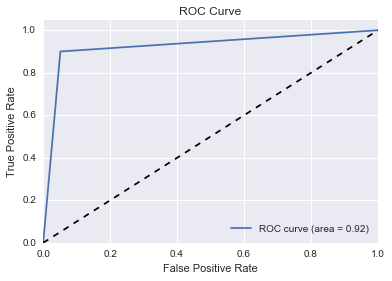

In [450]:
decision_tree_all=tree.DecisionTreeClassifier(criterion='gini',max_depth=20)
decision_tree_all.fit(X_train,y_train)
predict=decision_tree_all.predict(X_test)


t1=decision_tree_all.predict(X_train)
t=decision_tree_all.predict(X_test)
#print classification_report(y_test,t)
print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",accuracy_score(y_train,t1)
print "Model Accuracy(Test):",accuracy_score(y_test,t)
print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)
x=confusion_matrix(y_test,t)
tpr=x[1,1]/(x[1,0]+x[1,1])
fpr=x[0,1]/(x[0,0]+x[0,1])
print "True Positive Rate:",tpr
print "False Positive Rate:",fpr


fpr, tpr, _ =metrics.roc_curve(y_test,decision_tree_all.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [451]:
tree.export_graphviz(decision_tree_all,out_file='tree_all.dot',feature_names=X_train.columns) 
from sklearn.externals.six import StringIO  
import pydot
dot_data = StringIO() 
tree.export_graphviz(decision_tree_all, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

In [452]:
cutoff=[]
tpr=[]
fpr=[]
tnr=[]
for i in np.arange(0,1,0.05):
    cutoff.append(i)
    pred_prob=decision_tree_all.predict_proba(X_test)[:,[1]]
    pred=pred_prob>i
    pred=pred.astype(int)
    x=confusion_matrix(y_test, pred)
    tpr1=x[1,1]/(x[1,0]+x[1,1])
    tnr1=x[0,0]/(x[0,0]+x[0,1])
    fpr1=x[0,1]/(x[0,0]+x[0,1])
    tpr.append(tpr1)
    fpr.append(fpr1)
    tnr.append(tnr1)
threshold=DataFrame([cutoff,tpr,tnr,fpr]).transpose()
threshold.columns=['Threshold','True Positive Rate','True Negative Rate','False Positive Rate']
threshold.to_csv('threshold_model2.csv')
threshold

,Threshold,True Positive Rate,True Negative Rate,False Positive Rate
0,0.00,0.9,0.948718,0.051282
1,0.05,0.9,0.948718,0.051282
2,0.10,0.9,0.948718,0.051282
3,0.15,0.9,0.948718,0.051282
4,0.20,0.9,0.948718,0.051282
5,0.25,0.9,0.948718,0.051282
6,0.30,0.9,0.948718,0.051282
7,0.35,0.9,0.948718,0.051282
8,0.40,0.9,0.948718,0.051282
9,0.45,0.9,0.948718,0.051282


In [453]:
import statsmodels.api as sm
logit=sm.Logit(X_train,y_train)
result.logit.fit()
print result.summary()

ValueError: endog must be in the unit interval.

### Baseline Support Vector Machine

In [454]:
svm_all=svm.SVC()
svm_all.fit(X_train,y_train)
print svm_all.score(X_train,y_train)
predict=svm_all.predict(X_test)
print accuracy_score(predict,y_test)
print(y_train.value_counts())
print confusion_matrix(y_test,predict)
#print classification_report(y_test,predict)

0.991967871486
0.946107784431
0    183
1     66
Name: inducted_HOF, dtype: int64
[[109   8]
 [  1  49]]


### Baseline Naive Bayes

In [455]:
naive_bayes_all=GaussianNB()
naive_bayes_all.fit(X_train,y_train)
predict=naive_bayes_all.predict(X_test)



In [456]:
print confusion_matrix(y_test, t)
pred_prob=naive_bayes_all.predict_proba(X_test)[:,[1]]
pred=pred_prob>.00000001
pred=pred.astype(int)  
print confusion_matrix(y_test, pred)

[[111   6]
 [  5  45]]
[[90 27]
 [ 1 49]]


### Baseline Random Forest

MODEL METRICS
-------------
Model Accuracy(Train): 0.995983935743
Model Accuracy(Test): 0.964071856287
Confusion Matrix(Train):
[[183   0]
 [  1  65]]
Confusion Matrix(Test):
[[114   3]
 [  3  47]]
True Positive Rate: 0.94
False Positive Rate: 0.025641025641
ROC AUC: 0.99


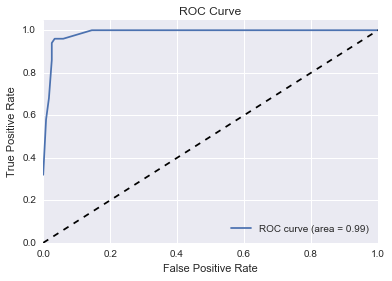

In [457]:
rf_all=RandomForestClassifier()
rf_all.fit(X_train,y_train)

t1=rf_all.predict(X_train)
t=rf_all.predict(X_test)
#print classification_report(y_test,t)
print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",accuracy_score(y_train,t1)
print "Model Accuracy(Test):",accuracy_score(y_test,t)
print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)
x=confusion_matrix(y_test,t)
tpr=x[1,1]/(x[1,0]+x[1,1])
fpr=x[0,1]/(x[0,0]+x[0,1])
print "True Positive Rate:",tpr
print "False Positive Rate:",fpr


fpr, tpr, _ =metrics.roc_curve(y_test,rf_all.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [458]:
cutoff=[]
tpr=[]
fpr=[]
tnr=[]
for i in np.arange(0,1,0.05):
    cutoff.append(i)
    pred_prob=rf_all.predict_proba(X_test)[:,[1]]
    pred=pred_prob>i
    pred=pred.astype(int)
    x=confusion_matrix(y_test, pred)
    tpr1=x[1,1]/(x[1,0]+x[1,1])
    tnr1=x[0,0]/(x[0,0]+x[0,1])
    fpr1=x[0,1]/(x[0,0]+x[0,1])
    tpr.append(tpr1)
    fpr.append(fpr1)
    tnr.append(tnr1)
threshold=DataFrame([cutoff,tpr,tnr,fpr]).transpose()
threshold.columns=['Threshold','True Positive Rate','True Negative Rate','False Positive Rate']
threshold.to_csv('threshold_model2.csv')
threshold

,Threshold,True Positive Rate,True Negative Rate,False Positive Rate
0,0.00,1.00,0.709402,0.290598
1,0.05,1.00,0.709402,0.290598
2,0.10,1.00,0.854701,0.145299
3,0.15,1.00,0.854701,0.145299
4,0.20,0.96,0.940171,0.059829
5,0.25,0.96,0.940171,0.059829
6,0.30,0.96,0.940171,0.059829
7,0.35,0.96,0.940171,0.059829
8,0.40,0.96,0.965812,0.034188
9,0.45,0.96,0.965812,0.034188


### Baseline Gradient Boosting

MODEL METRICS
-------------
Model Accuracy(Train): 1.0
Model Accuracy(Test): 0.952095808383
Confusion Matrix(Train):
[[183   0]
 [  0  66]]
Confusion Matrix(Test):
[[111   6]
 [  2  48]]
True Positive Rate: 0.96
False Positive Rate: 0.0512820512821
ROC AUC: 0.98


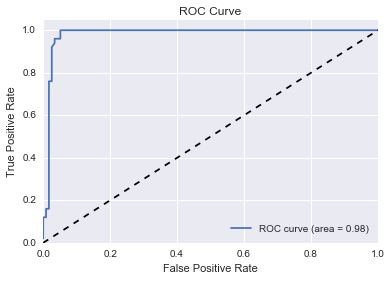

In [459]:
gbt_all=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)
gbt_all.fit(X_train,y_train)



t1=gbt_all.predict(X_train)
t=gbt_all.predict(X_test)
#print classification_report(y_test,t)
print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",accuracy_score(y_train,t1)
print "Model Accuracy(Test):",accuracy_score(y_test,t)
print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)
x=confusion_matrix(y_test,t)
tpr=x[1,1]/(x[1,0]+x[1,1])
fpr=x[0,1]/(x[0,0]+x[0,1])
print "True Positive Rate:",tpr
print "False Positive Rate:",fpr


fpr, tpr, _ =metrics.roc_curve(y_test,gbt_all.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [460]:
cutoff=[]
tpr=[]
fpr=[]
tnr=[]
for i in np.arange(0,1,0.05):
    cutoff.append(i)
    pred_prob=gbt_all.predict_proba(X_test)[:,[1]]
    pred=pred_prob>i
    pred=pred.astype(int)
    x=confusion_matrix(y_test, pred)
    tpr1=x[1,1]/(x[1,0]+x[1,1])
    tnr1=x[0,0]/(x[0,0]+x[0,1])
    fpr1=x[0,1]/(x[0,0]+x[0,1])
    tpr.append(tpr1)
    fpr.append(fpr1)
    tnr.append(tnr1)
threshold=DataFrame([cutoff,tpr,tnr,fpr]).transpose()
threshold.columns=['Threshold','True Positive Rate','True Negative Rate','False Positive Rate']
threshold.to_csv('threshold_model2.csv')
threshold

,Threshold,True Positive Rate,True Negative Rate,False Positive Rate
0,0.00,1.00,0.000000,1.000000
1,0.05,1.00,0.940171,0.059829
2,0.10,0.98,0.948718,0.051282
3,0.15,0.96,0.948718,0.051282
4,0.20,0.96,0.948718,0.051282
5,0.25,0.96,0.948718,0.051282
6,0.30,0.96,0.948718,0.051282
7,0.35,0.96,0.948718,0.051282
8,0.40,0.96,0.948718,0.051282
9,0.45,0.96,0.948718,0.051282


In [461]:
print confusion_matrix(y_test, t)
pred_prob=gbt_all.predict_proba(X_test)[:,[1]]
pred=pred_prob>.01
pred=pred.astype(int)  
print confusion_matrix(y_test, pred)

[[111   6]
 [  2  48]]
[[107  10]
 [  0  50]]


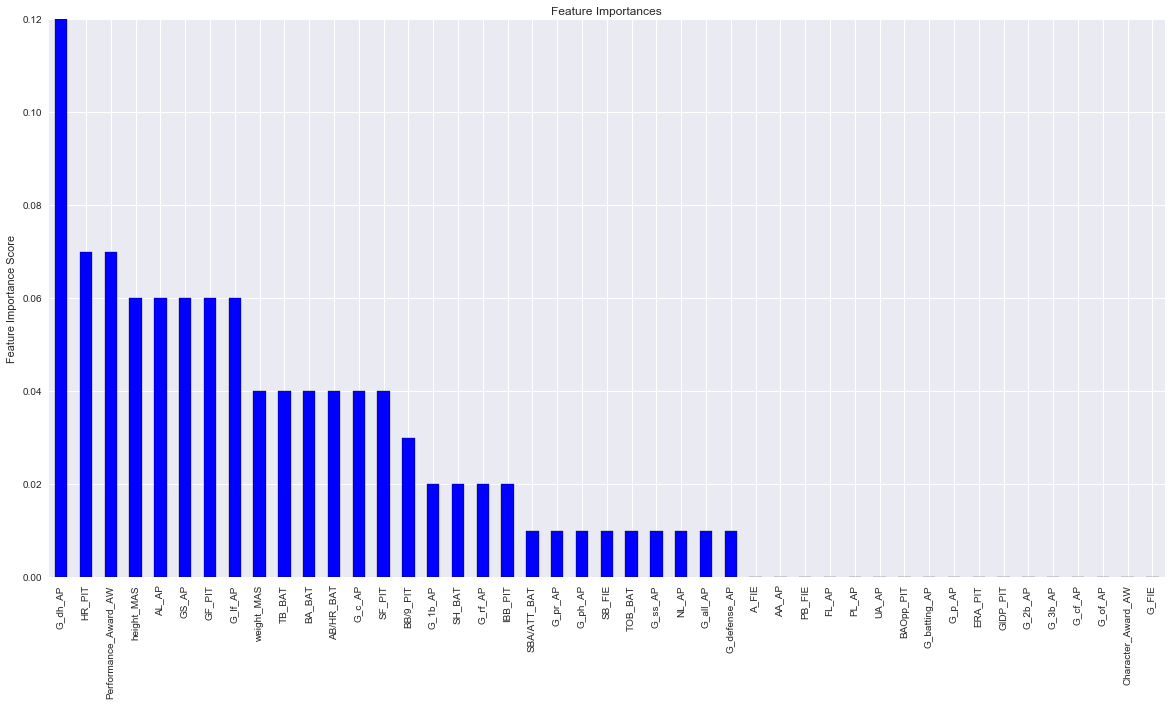

In [462]:
plt.figure(figsize=(20,10))
feat_imp = pd.Series(gbt_all.feature_importances_, X_test.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

#### Artificial Neural Networks

In [463]:
!pip install scikit-neuralnetwork

In [138]:
from sklearn.neural_network import MLPClassifier

ImportError: cannot import name MLPClassifier

In [147]:
!pip install git+git://github.com/scikit-learn/scikit-learn.git#egg=scikit-learn

You are using pip version 8.0.3, however version 8.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [139]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.1.
The scikit-learn version is 0.17.


### Gradient Boosting

In [263]:
def modelfit(alg, X_train, X_test, y_train, y_test, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train,y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, X_train.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        
        
        
#TEST DATA
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_test)
    dtrain_predprob = alg.predict_proba(X_test)[:,1]
    

    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(y_test.values, dtrain_predictions)
    print "AUC Score (Test): %f" % metrics.roc_auc_score(y_test, dtrain_predprob)
    print confusion_matrix(y_test,dtrain_predictions)

        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, X_test.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.9676675 | Std - 0.01559092 | Min - 0.9375661 | Max - 0.9830688

Model Report
Accuracy : 0.9327
AUC Score (Test): 0.988579
[[117   9]
 [  5  77]]


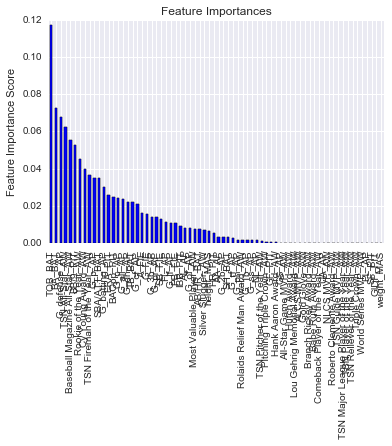

In [1601]:
target='inducted_HOF'
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train, X_test, y_train, y_test)

In [1196]:
#Choose all predictors except target & IDcols
import pylab as pl
param_test1 = {'n_estimators':range(1,81,1)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 1}, 0.5)

In [1197]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.98086, std: 0.00959, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 400, 'max_depth': 5},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 800, 'max_depth': 5},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 1000, 'max_depth': 5},
  mean: 0.98086, std: 0.00959, params: {'min_samples_split': 200, 'max_depth': 7},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 400, 'max_depth': 7},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 600, 'max_depth': 7},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 800, 'max_depth': 7},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 1000, 'max_depth': 7},
  mean: 0.98086, std: 0.00959, params: {'min_samples_split': 200, 'max_depth': 9},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 400, 'max_depth': 9},
  

In [1198]:
param_test3 = {'min_samples_split':range(100,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 30, 'min_samples_split': 100}, 0.97673280423280429)


Model Report
Accuracy : 0.9841
AUC Score (Train): 0.998199
CV Score : Mean - 0.9767328 | Std - 0.01339147 | Min - 0.9571429 | Max - 0.994709

Model Report
Accuracy : 0.9052
AUC Score (Test): 0.969882
[[115   8]
 [ 12  76]]


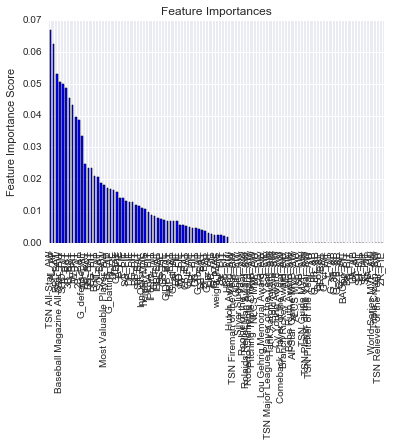

In [1199]:
modelfit(gsearch3.best_estimator_, X_train, X_test, y_train, y_test)

# 7. SEGMENTING INTO PITCHERS/HITTERS/CATCHERS

In [464]:
getcolinfo()

In [465]:
baseball['G_IF_AP']=baseball['G_1b_AP']+baseball['G_2b_AP']+baseball['G_3b_AP']+baseball['G_ss_AP']

In [466]:
baseball['G_F_AP']=baseball['G_IF_AP']+baseball['G_of_AP']

In [467]:
baseball['player_cat']=baseball[['G_F_AP','G_p_AP','G_c_AP']].idxmax(axis=1)

In [468]:
new={'G_F_AP':'Fielder','G_p_AP':'Pitcher','G_c_AP':'Catcher'}
baseball['player_cat']=baseball.player_cat.map(new)

In [469]:
baseball.to_csv('bb_with cat.csv')

In [470]:
catcher=baseball[baseball.player_cat=='Catcher']

In [471]:
fielder=baseball[baseball.player_cat=='Fielder']

In [472]:
pitcher=baseball[baseball.player_cat=='Pitcher']

In [473]:
pitcher.shape

(4244, 50)

In [474]:
pitcher.inducted_HOF.value_counts()

0    4204
1      40
Name: inducted_HOF, dtype: int64

In [475]:
getcolinfo()

In [476]:
pitchingcol

[u'HR_PIT',
 u'BAOpp_PIT',
 u'ERA_PIT',
 u'IBB_PIT',
 u'GF_PIT',
 u'SF_PIT',
 u'GIDP_PIT',
 u'BB/9_PIT']

In [477]:
fielder.columns

Index([          u'weight_MAS',           u'height_MAS',
                      u'AA_AP',                u'AL_AP',
                      u'FL_AP',                u'NL_AP',
                      u'PL_AP',                u'UA_AP',
                   u'G_all_AP',                u'GS_AP',
               u'G_batting_AP',         u'G_defense_AP',
                     u'G_p_AP',               u'G_c_AP',
                    u'G_1b_AP',              u'G_2b_AP',
                    u'G_3b_AP',              u'G_ss_AP',
                    u'G_lf_AP',              u'G_cf_AP',
                    u'G_rf_AP',              u'G_of_AP',
                    u'G_dh_AP',              u'G_ph_AP',
                    u'G_pr_AP',               u'SH_BAT',
                     u'HR_PIT',            u'BAOpp_PIT',
                    u'ERA_PIT',              u'IBB_PIT',
                     u'GF_PIT',               u'SF_PIT',
                   u'GIDP_PIT',                u'G_FIE',
                      u'A_FIE',

# 8. MODELLING FOR FIELDERS

In [478]:
fielder.drop(pitchingcol,axis=1,inplace=True)
fielder_elligible=fielder[fielder.HOF_Eligibility==1]
fielder_hof=fielder[fielder.inducted_HOF==1]
fielder_elligible.drop(['HOF_Eligibility','player_cat'],axis=1,inplace=True)
fielder_hof.drop(['HOF_Eligibility','player_cat'],axis=1,inplace=True)
x=fielder_elligible.append(fielder_hof)
print x.shape
print x.inducted_HOF.value_counts()
fielder_elligible=fielder_elligible.sample(n=100,random_state=1)
mdl_rdy=fielder_elligible.append(fielder_hof)
x=mdl_rdy.drop(['inducted_HOF'],axis=1)
y=mdl_rdy.inducted_HOF
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(288, 40)
0    221
1     67
Name: inducted_HOF, dtype: int64


C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [479]:
mdl_rdy.shape

(167, 40)

In [480]:
mdl_rdy.inducted_HOF.value_counts()

0    100
1     67
Name: inducted_HOF, dtype: int64

### Logistic Regression

MODEL METRICS
-------------
Model Accuracy(Train): 1.0
Model Accuracy(Test): 0.970149253731
Confusion Matrix(Train):
[[58  0]
 [ 0 42]]
Confusion Matrix(Test):
[[42  0]
 [ 2 23]]
True Positive Rate: 0.92
False Positive Rate: 0.0
ROC AUC: 0.98


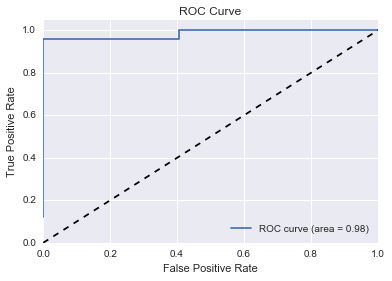

In [481]:
log_regression_fielder=LogisticRegression(penalty='l1')
log_regression_fielder.fit(X_train,y_train)


t1=log_regression_fielder.predict(X_train)
t=log_regression_fielder.predict(X_test)
#print classification_report(y_test,t)
print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",accuracy_score(y_train,t1)
print "Model Accuracy(Test):",accuracy_score(y_test,t)
print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)
x=confusion_matrix(y_test,t)
tpr=x[1,1]/(x[1,0]+x[1,1])
fpr=x[0,1]/(x[0,0]+x[0,1])
print "True Positive Rate:",tpr
print "False Positive Rate:",fpr


fpr, tpr, _ =metrics.roc_curve(y_test,log_regression_fielder.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [482]:
print confusion_matrix(y_test, t)
pred_prob=log_regression_fielder.predict_proba(X_test)[:,[1]]
pred=pred_prob>.00000001
pred=pred.astype(int)  
print confusion_matrix(y_test, pred)

[[42  0]
 [ 2 23]]
[[ 3 39]
 [ 0 25]]


In [483]:
cutoff=[]
tpr=[]
fpr=[]
tnr=[]
for i in np.arange(0,1,0.05):
    cutoff.append(i)
    pred_prob=log_regression_fielder.predict_proba(X_test)[:,[1]]
    pred=pred_prob>i
    pred=pred.astype(int)
    x=confusion_matrix(y_test, pred)
    tpr1=x[1,1]/(x[1,0]+x[1,1])
    tnr1=x[0,0]/(x[0,0]+x[0,1])
    fpr1=x[0,1]/(x[0,0]+x[0,1])
    tpr.append(tpr1)
    fpr.append(fpr1)
    tnr.append(tnr1)
threshold=DataFrame([cutoff,tpr,tnr,fpr]).transpose()
threshold.columns=['Threshold','True Positive Rate','True Negative Rate','False Positive Rate']
threshold.to_csv('threshold_model2.csv')
threshold

,Threshold,True Positive Rate,True Negative Rate,False Positive Rate
0,0.00,1.00,0.000000,1.000000
1,0.05,0.96,0.904762,0.095238
2,0.10,0.96,0.952381,0.047619
3,0.15,0.96,0.976190,0.023810
4,0.20,0.96,0.976190,0.023810
5,0.25,0.96,0.976190,0.023810
6,0.30,0.96,0.976190,0.023810
7,0.35,0.96,0.976190,0.023810
8,0.40,0.96,0.976190,0.023810
9,0.45,0.96,1.000000,0.000000


In [484]:
coeffecients1=DataFrame(zip(X_train.columns,log_regression_fielder.coef_.flatten()),columns=['Variable','Coeffecient'])
imp_coefficients=coeffecients1[coeffecients1.Coeffecient<>0]
imp_coefficients.sort_values(by='Coeffecient',ascending=False)

,Variable,Coeffecient
35,Character_Award_AW,0.603076
22,G_dh_AP,0.593796
34,SBA/ATT_BAT,0.529820
19,G_cf_AP,0.485613
38,G_F_AP,0.255400
36,Performance_Award_AW,0.158054
14,G_1b_AP,0.126309
15,G_2b_AP,0.095959
18,G_lf_AP,-0.010704
5,NL_AP,-0.047754


### Decision Tree

MODEL METRICS
-------------
Model Accuracy(Train): 1.0
Model Accuracy(Test): 0.955223880597
Confusion Matrix(Train):
[[58  0]
 [ 0 42]]
Confusion Matrix(Test):
[[41  1]
 [ 2 23]]
ROC AUC: 0.95


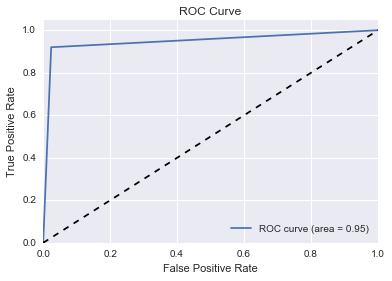

In [485]:
decision_tree_fielder=tree.DecisionTreeClassifier(criterion='gini',max_depth=20)
decision_tree_fielder.fit(X_train,y_train)


print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",decision_tree_fielder.score(X_train,y_train)
t1=decision_tree_fielder.predict(X_train)
t=decision_tree_fielder.predict(X_test)
print "Model Accuracy(Test):",accuracy_score(y_test,t)
print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)

fpr, tpr, _ =metrics.roc_curve(y_test,decision_tree_fielder.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [486]:
tree.export_graphviz(decision_tree_fielder,out_file='tree_fielders.dot',feature_names=X_train.columns) 
from sklearn.externals.six import StringIO  
import pydot
dot_data1 = StringIO() 
tree.export_graphviz(decision_tree_fielder, out_file=dot_data1) 
graph = pydot.graph_from_dot_data(dot_data1.getvalue()) 

### Support Vector Machine

In [165]:
svm_fielder=svm.SVC()
svm_fielder.fit(X_train,y_train)
print svm_fielder.score(X_train,y_train)
predict=svm_fielder.predict(X_test)
print accuracy_score(predict,y_test)
print(y_train.value_counts())
print confusion_matrix(y_test,predict)
print classification_report(y_test,predict)

1.0
0.955223880597
0    58
1    42
Name: inducted_HOF, dtype: int64
[[39  3]
 [ 0 25]]
             precision    recall  f1-score   support

          0       1.00      0.93      0.96        42
          1       0.89      1.00      0.94        25

avg / total       0.96      0.96      0.96        67



### Naive Bayes

MODEL METRICS
-------------
Model Accuracy(Train): 0.97
Model Accuracy(Test): 0.955223880597
Confusion Matrix(Train):
[[58  0]
 [ 3 39]]
Confusion Matrix(Test):
[[41  1]
 [ 2 23]]
ROC AUC: 0.95


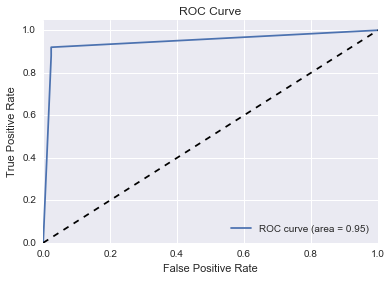

In [166]:
naive_bayes_fielder=GaussianNB()
naive_bayes_fielder.fit(X_train,y_train)


print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",naive_bayes_fielder.score(X_train,y_train)
t1=naive_bayes_fielder.predict(X_train)
t=naive_bayes_fielder.predict(X_test)
print "Model Accuracy(Test):",accuracy_score(y_test,t)
print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)


fpr, tpr, _ =metrics.roc_curve(y_test,naive_bayes_fielder.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Random Forests

MODEL METRICS
-------------
Model Accuracy(Train): 1.0
Model Accuracy(Test): 0.940298507463
Confusion Matrix(Train):
[[58  0]
 [ 0 42]]
Confusion Matrix(Test):
[[40  2]
 [ 2 23]]
True Positive Rate: 0.92
False Positive Rate: 0.047619047619
ROC AUC: 1.00


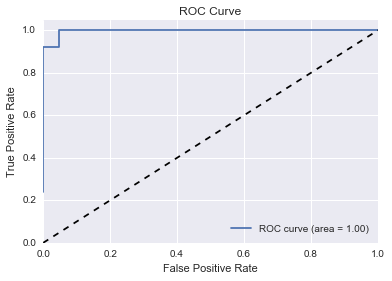

In [487]:
rf_fielder=RandomForestClassifier()
rf_fielder.fit(X_train,y_train)


t1=rf_fielder.predict(X_train)
t=rf_fielder.predict(X_test)
#print classification_report(y_test,t)
print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",accuracy_score(y_train,t1)
print "Model Accuracy(Test):",accuracy_score(y_test,t)
print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)
x=confusion_matrix(y_test,t)
tpr=x[1,1]/(x[1,0]+x[1,1])
fpr=x[0,1]/(x[0,0]+x[0,1])
print "True Positive Rate:",tpr
print "False Positive Rate:",fpr


fpr, tpr, _ =metrics.roc_curve(y_test,rf_fielder.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [488]:
cutoff=[]
tpr=[]
fpr=[]
tnr=[]
for i in np.arange(0,1,0.05):
    cutoff.append(i)
    pred_prob=rf_fielder.predict_proba(X_test)[:,[1]]
    pred=pred_prob>i
    pred=pred.astype(int)
    x=confusion_matrix(y_test, pred)
    tpr1=x[1,1]/(x[1,0]+x[1,1])
    tnr1=x[0,0]/(x[0,0]+x[0,1])
    fpr1=x[0,1]/(x[0,0]+x[0,1])
    tpr.append(tpr1)
    fpr.append(fpr1)
    tnr.append(tnr1)
threshold=DataFrame([cutoff,tpr,tnr,fpr]).transpose()
threshold.columns=['Threshold','True Positive Rate','True Negative Rate','False Positive Rate']
threshold.to_csv('threshold_model3.csv')
threshold

,Threshold,True Positive Rate,True Negative Rate,False Positive Rate
0,0.00,1.00,0.857143,0.142857
1,0.05,1.00,0.857143,0.142857
2,0.10,1.00,0.928571,0.071429
3,0.15,1.00,0.928571,0.071429
4,0.20,1.00,0.952381,0.047619
5,0.25,1.00,0.952381,0.047619
6,0.30,0.96,0.952381,0.047619
7,0.35,0.96,0.952381,0.047619
8,0.40,0.96,0.952381,0.047619
9,0.45,0.96,0.952381,0.047619


### Gradient Boosting

MODEL METRICS
-------------
Model Accuracy(Train): 1.0
Model Accuracy(Test): 0.925373134328
Confusion Matrix(Train):
[[58  0]
 [ 0 42]]
Confusion Matrix(Test):
[[40  2]
 [ 3 22]]
True Positive Rate: 0.88
False Positive Rate: 0.047619047619
ROC AUC: 0.99


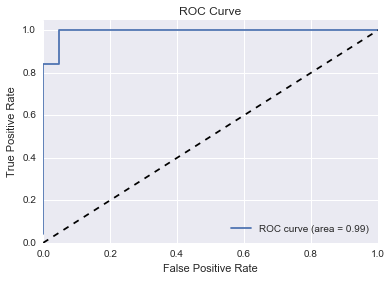

In [489]:
gbt_fielder=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)
gbt_fielder.fit(X_train,y_train)



t1=gbt_fielder.predict(X_train)
t=gbt_fielder.predict(X_test)
#print classification_report(y_test,t)
print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",accuracy_score(y_train,t1)
print "Model Accuracy(Test):",accuracy_score(y_test,t)
print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)
x=confusion_matrix(y_test,t)
tpr=x[1,1]/(x[1,0]+x[1,1])
fpr=x[0,1]/(x[0,0]+x[0,1])
print "True Positive Rate:",tpr
print "False Positive Rate:",fpr


fpr, tpr, _ =metrics.roc_curve(y_test,gbt_fielder.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [490]:
print confusion_matrix(y_test, t)
pred_prob=gbt_fielder.predict_proba(X_test)[:,[1]]
pred=pred_prob>.01
pred=pred.astype(int)  
print confusion_matrix(y_test, pred)

[[40  2]
 [ 3 22]]
[[40  2]
 [ 0 25]]


In [493]:
cutoff=[]
tpr=[]
fpr=[]
tnr=[]
for i in np.arange(0,0.1,0.01):
    cutoff.append(i)
    pred_prob=gbt_fielder.predict_proba(X_test)[:,[1]]
    pred=pred_prob>i
    pred=pred.astype(int)
    x=confusion_matrix(y_test, pred)
    tpr1=x[1,1]/(x[1,0]+x[1,1])
    tnr1=x[0,0]/(x[0,0]+x[0,1])
    fpr1=x[0,1]/(x[0,0]+x[0,1])
    tpr.append(tpr1)
    fpr.append(fpr1)
    tnr.append(tnr1)
threshold=DataFrame([cutoff,tpr,tnr,fpr]).transpose()
threshold.columns=['Threshold','True Positive Rate','True Negative Rate','False Positive Rate']
threshold.to_csv('threshold_model2.csv')
threshold

,Threshold,True Positive Rate,True Negative Rate,False Positive Rate
0,0.00,1.00,0.000000,1.000000
1,0.01,1.00,0.952381,0.047619
2,0.02,0.96,0.952381,0.047619
3,0.03,0.96,0.952381,0.047619
4,0.04,0.96,0.952381,0.047619
5,0.05,0.96,0.952381,0.047619
6,0.06,0.92,0.952381,0.047619
7,0.07,0.92,0.952381,0.047619
8,0.08,0.92,0.952381,0.047619
9,0.09,0.92,0.952381,0.047619


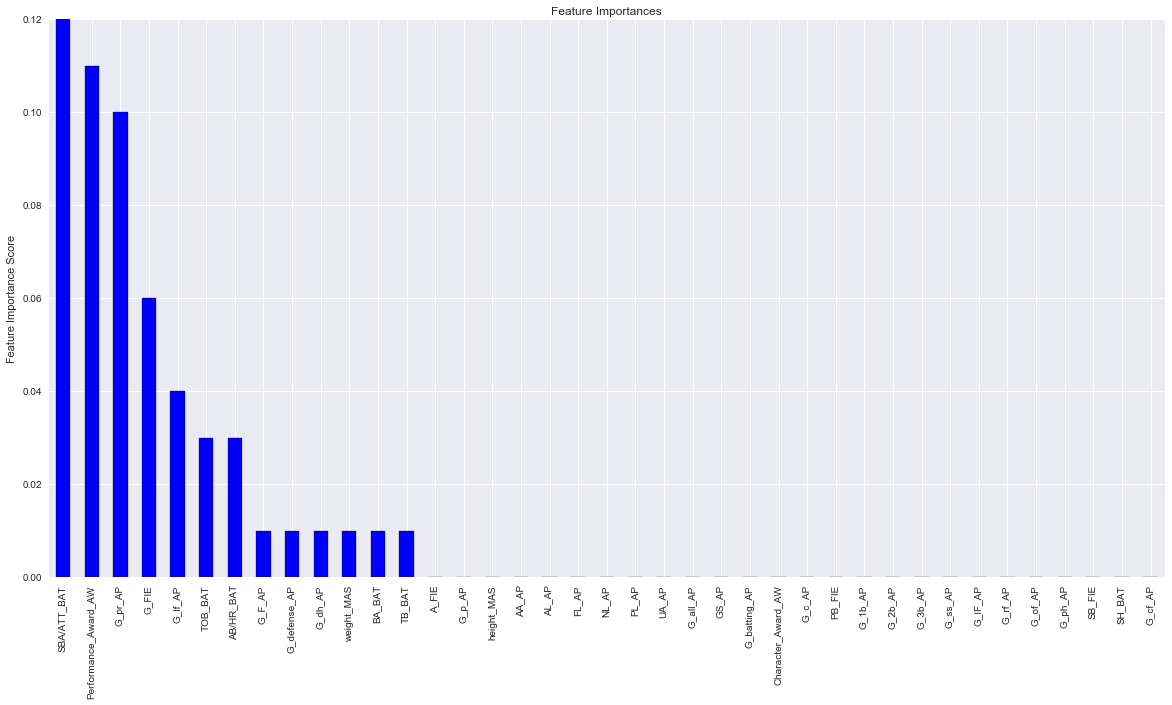

In [492]:
plt.figure(figsize=(20,10))
feat_imp = pd.Series(gbt_fielder.feature_importances_, X_test.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

# 9. MODELLING FOR PITCHERS

In [173]:
pitcher.drop(battingcol,axis=1,inplace=True)

C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [174]:
pitcher.drop(fieldingcol,axis=1,inplace=True)

C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [175]:
pitcher.inducted_HOF.value_counts()

0    4204
1      40
Name: inducted_HOF, dtype: int64

In [177]:
pitcher_elligible=pitcher[pitcher.HOF_Eligibility==1]
pitcher_hof=pitcher[pitcher.inducted_HOF==1]
pitcher_elligible.drop(['HOF_Eligibility','player_cat'],axis=1,inplace=True)
pitcher_hof.drop(['HOF_Eligibility','player_cat'],axis=1,inplace=True)
x=pitcher_elligible.append(pitcher_hof)
print x.shape
print x.inducted_HOF.value_counts()
print pitcher_hof.inducted_HOF.value_counts()
pitcher_elligible=pitcher_elligible.sample(n=100,random_state=1)
mdl_rdy=pitcher_elligible.append(pitcher_hof)
x=mdl_rdy.drop(['inducted_HOF'],axis=1)
y=mdl_rdy.inducted_HOF
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(277, 63)
0    237
1     40
Name: inducted_HOF, dtype: int64
1    40
Name: inducted_HOF, dtype: int64


In [178]:
mdl_rdy.shape

(140, 63)

### Logistic Regression

MODEL METRICS
-------------
Model Accuracy(Train): 1.0
Model Accuracy(Test): 0.910714285714
Confusion Matrix(Train):
[[62  0]
 [ 0 22]]
Confusion Matrix(Test):
[[36  2]
 [ 3 15]]
True Positive Rate: 0.833333333333
False Positive Rate: 0.0526315789474
ROC AUC: 0.99


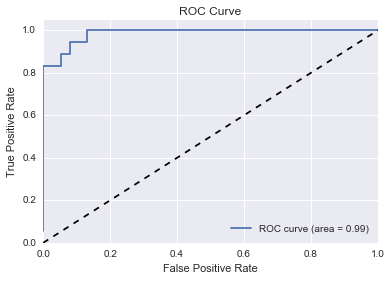

In [179]:
log_regression_pitcher=LogisticRegression(penalty='l1')
log_regression_pitcher.fit(X_train,y_train)


t1=log_regression_pitcher.predict(X_train)
t=log_regression_pitcher.predict(X_test)
#print classification_report(y_test,t)
print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",accuracy_score(y_train,t1)
print "Model Accuracy(Test):",accuracy_score(y_test,t)
print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)
x=confusion_matrix(y_test,t)
tpr=x[1,1]/(x[1,0]+x[1,1])
fpr=x[0,1]/(x[0,0]+x[0,1])
print "True Positive Rate:",tpr
print "False Positive Rate:",fpr


fpr, tpr, _ =metrics.roc_curve(y_test,log_regression_pitcher.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [180]:
cutoff=[]
tpr=[]
fpr=[]
tnr=[]
for i in np.arange(0,1,0.05):
    cutoff.append(i)
    pred_prob=log_regression_pitcher.predict_proba(X_test)[:,[1]]
    pred=pred_prob>i
    pred=pred.astype(int)
    x=confusion_matrix(y_test, pred)
    tpr1=x[1,1]/(x[1,0]+x[1,1])
    tnr1=x[0,0]/(x[0,0]+x[0,1])
    fpr1=x[0,1]/(x[0,0]+x[0,1])
    tpr.append(tpr1)
    fpr.append(fpr1)
    tnr.append(tnr1)
threshold=DataFrame([cutoff,tpr,tnr,fpr]).transpose()
threshold.columns=['Threshold','True Positive Rate','True Negative Rate','False Positive Rate']
threshold.to_csv('threshold_model2.csv')
threshold

,Threshold,True Positive Rate,True Negative Rate,False Positive Rate
0,0.00,1.000000,0.000000,1.000000
1,0.05,1.000000,0.763158,0.236842
2,0.10,1.000000,0.842105,0.157895
3,0.15,1.000000,0.842105,0.157895
4,0.20,1.000000,0.868421,0.131579
5,0.25,0.944444,0.894737,0.105263
6,0.30,0.944444,0.894737,0.105263
7,0.35,0.944444,0.921053,0.078947
8,0.40,0.944444,0.921053,0.078947
9,0.45,0.888889,0.921053,0.078947


In [181]:
coeffecients1=DataFrame(zip(X_train.columns,log_regression_pitcher.coef_.flatten()),columns=['Variable','Coeffecient'])
imp_coefficients=coeffecients1[coeffecients1.Coeffecient<>0]
imp_coefficients.sort_values(by='Coeffecient',ascending=False)

,Variable,Coeffecient
59,BB/9_PIT,0.898690
20,TSN All-Star_AW,0.391155
8,Cy Young Award_AW,0.352168
37,G_batting_AP,0.320219
5,Baseball Magazine All-Star_AW,0.242840
56,GF_PIT,0.228625
3,All-Star Game MVP_AW,0.096745
16,Roberto Clemente Award_AW,0.062115
24,TSN Pitcher of the Year_AW,0.043886
12,Lou Gehrig Memorial Award_AW,0.043053


### Decision Tree

MODEL METRICS
-------------
Model Accuracy(Train): 1.0
Model Accuracy(Test): 0.910714285714
Confusion Matrix(Train):
[[62  0]
 [ 0 22]]
Confusion Matrix(Test):
[[35  3]
 [ 2 16]]
True Positive Rate: 0.888888888889
False Positive Rate: 0.0789473684211
ROC AUC: 0.90


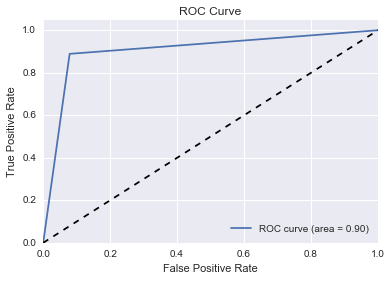

In [182]:
decision_tree_pitcher=tree.DecisionTreeClassifier(criterion='gini',max_depth=20)
decision_tree_pitcher.fit(X_train,y_train)


t1=decision_tree_pitcher.predict(X_train)
t=decision_tree_pitcher.predict(X_test)
#print classification_report(y_test,t)
print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",accuracy_score(y_train,t1)
print "Model Accuracy(Test):",accuracy_score(y_test,t)
print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)
x=confusion_matrix(y_test,t)
tpr=x[1,1]/(x[1,0]+x[1,1])
fpr=x[0,1]/(x[0,0]+x[0,1])
print "True Positive Rate:",tpr
print "False Positive Rate:",fpr

fpr, tpr, _ =metrics.roc_curve(y_test,decision_tree_pitcher.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [183]:
tree.export_graphviz(decision_tree_pitcher,out_file='tree_pitcher.dot',feature_names=X_train.columns) 
from sklearn.externals.six import StringIO  
import pydot
dot_data2 = StringIO() 
tree.export_graphviz(decision_tree_pitcher, out_file=dot_data2) 
graph = pydot.graph_from_dot_data(dot_data2.getvalue()) 

### Support Vector Machine

In [190]:
svc_pitcher=svm.SVC()
svc_pitcher.fit(X_train,y_train)
print svc_pitcher.score(X_train,y_train)
predict=svc_pitcher.predict(X_test)
print accuracy_score(predict,y_test)
print(y_train.value_counts())
print confusion_matrix(y_test,predict)
#print classification_report(y_test,predict)

1.0
0.964285714286
0    62
1    22
Name: inducted_HOF, dtype: int64
[[36  2]
 [ 0 18]]


### Naive Bayes

### Random Forests

MODEL METRICS
-------------
Model Accuracy(Train): 0.988095238095
Model Accuracy(Test): 0.964285714286
Confusion Matrix(Train):
[[62  0]
 [ 1 21]]
Confusion Matrix(Test):
[[38  0]
 [ 2 16]]
True Positive Rate: 0.888888888889
False Positive Rate: 0.0
ROC AUC: 1.00


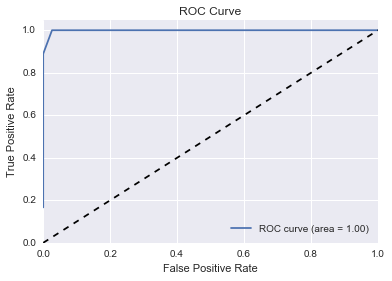

In [184]:
rf_pitcher=RandomForestClassifier()
rf_pitcher.fit(X_train,y_train)

t1=rf_pitcher.predict(X_train)
t=rf_pitcher.predict(X_test)
#print classification_report(y_test,t)
print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",accuracy_score(y_train,t1)
print "Model Accuracy(Test):",accuracy_score(y_test,t)
print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)
x=confusion_matrix(y_test,t)
tpr=x[1,1]/(x[1,0]+x[1,1])
fpr=x[0,1]/(x[0,0]+x[0,1])
print "True Positive Rate:",tpr
print "False Positive Rate:",fpr


fpr, tpr, _ =metrics.roc_curve(y_test,rf_pitcher.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [185]:
cutoff=[]
tpr=[]
fpr=[]
tnr=[]
for i in np.arange(0,1,0.1):
    cutoff.append(i)
    pred_prob=rf_pitcher.predict_proba(X_test)[:,[1]]
    pred=pred_prob>i
    pred=pred.astype(int)
    x=confusion_matrix(y_test, pred)
    tpr1=x[1,1]/(x[1,0]+x[1,1])
    tnr1=x[0,0]/(x[0,0]+x[0,1])
    fpr1=x[0,1]/(x[0,0]+x[0,1])
    tpr.append(tpr1)
    fpr.append(fpr1)
    tnr.append(tnr1)
threshold=DataFrame([cutoff,tpr,tnr,fpr]).transpose()
threshold.columns=['Threshold','True Positive Rate','True Negative Rate','False Positive Rate']
threshold.to_csv('threshold_model2.csv')
threshold

,Threshold,True Positive Rate,True Negative Rate,False Positive Rate
0,0.0,1.000000,0.815789,0.184211
1,0.1,1.000000,0.894737,0.105263
2,0.2,1.000000,0.921053,0.078947
3,0.3,1.000000,0.947368,0.052632
4,0.4,1.000000,0.973684,0.026316
5,0.5,0.888889,1.000000,0.000000
6,0.6,0.777778,1.000000,0.000000
7,0.7,0.666667,1.000000,0.000000
8,0.8,0.388889,1.000000,0.000000
9,0.9,0.166667,1.000000,0.000000


### Gradient Boosting

MODEL METRICS
-------------
Model Accuracy(Train): 1.0
Model Accuracy(Test): 0.946428571429
Confusion Matrix(Train):
[[62  0]
 [ 0 22]]
Confusion Matrix(Test):
[[37  1]
 [ 2 16]]
True Positive Rate: 0.888888888889
False Positive Rate: 0.0263157894737
ROC AUC: 0.99


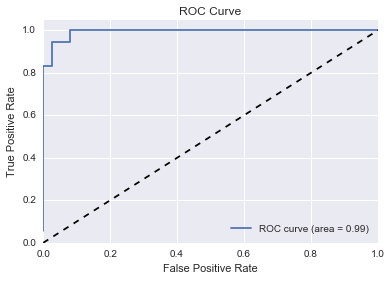

In [186]:
gbt_pitcher=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)
gbt_pitcher.fit(X_train,y_train)

t1=gbt_pitcher.predict(X_train)
t=gbt_pitcher.predict(X_test)
#print classification_report(y_test,t)
print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",accuracy_score(y_train,t1)
print "Model Accuracy(Test):",accuracy_score(y_test,t)
print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)
x=confusion_matrix(y_test,t)
tpr=x[1,1]/(x[1,0]+x[1,1])
fpr=x[0,1]/(x[0,0]+x[0,1])
print "True Positive Rate:",tpr
print "False Positive Rate:",fpr


fpr, tpr, _ =metrics.roc_curve(y_test,gbt_pitcher.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [187]:

cutoff=[]
tpr=[]
fpr=[]
tnr=[]
for i in np.arange(0,0.05,0.005):
    cutoff.append(i)
    pred_prob=gbt_pitcher.predict_proba(X_test)[:,[1]]
    pred=pred_prob>i
    pred=pred.astype(int)
    x=confusion_matrix(y_test, pred)
    tpr1=x[1,1]/(x[1,0]+x[1,1])
    tnr1=x[0,0]/(x[0,0]+x[0,1])
    fpr1=x[0,1]/(x[0,0]+x[0,1])
    tpr.append(tpr1)
    fpr.append(fpr1)
    tnr.append(tnr1)
threshold=DataFrame([cutoff,tpr,tnr,fpr]).transpose()
threshold.columns=['Threshold','True Positive Rate','True Negative Rate','False Positive Rate']
threshold.to_csv('threshold_model2.csv')
threshold

,Threshold,True Positive Rate,True Negative Rate,False Positive Rate
0,0.000,1.000000,0.000000,1.000000
1,0.005,1.000000,0.921053,0.078947
2,0.010,1.000000,0.921053,0.078947
3,0.015,0.944444,0.921053,0.078947
4,0.020,0.944444,0.921053,0.078947
5,0.025,0.944444,0.921053,0.078947
6,0.030,0.944444,0.921053,0.078947
7,0.035,0.944444,0.921053,0.078947
8,0.040,0.944444,0.921053,0.078947
9,0.045,0.944444,0.947368,0.052632


In [188]:
print confusion_matrix(y_test, t)
pred_prob=gbt_pitcher.predict_proba(X_test)[:,[1]]
pred=pred_prob>.01
pred=pred.astype(int)  
print confusion_matrix(y_test, pred)

[[37  1]
 [ 2 16]]
[[35  3]
 [ 0 18]]


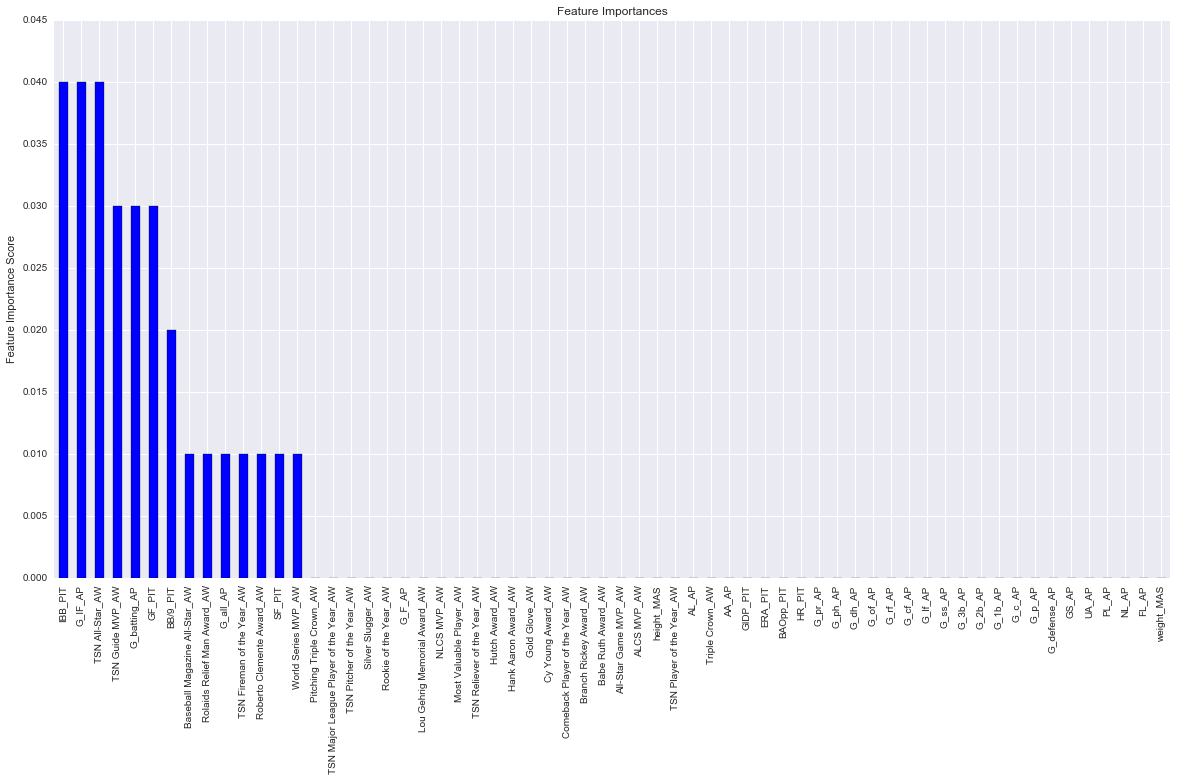

In [189]:
plt.figure(figsize=(20,10))
feat_imp = pd.Series(gbt_pitcher.feature_importances_, X_test.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

# 10. MODELLING FOR CATCHERS

In [190]:
#catcher.drop(pitchingcol,axis=1,inplace=True)
catcher_elligible=catcher[catcher.HOF_Eligibility==1]
catcher_hof=catcher[catcher.inducted_HOF==1]
catcher_elligible.drop(['HOF_Eligibility','player_cat'],axis=1,inplace=True)
catcher_hof.drop(['HOF_Eligibility','player_cat'],axis=1,inplace=True)
x=catcher_elligible.append(catcher_hof)
print x.shape
print x.inducted_HOF.value_counts()
print catcher_hof.inducted_HOF.value_counts()
catcher_elligible=catcher_elligible.sample(n=20)
mdl_rdy=catcher_elligible.append(catcher_hof)
x=mdl_rdy.drop(['inducted_HOF'],axis=1)
y=mdl_rdy.inducted_HOF
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(77, 73)
0    68
1     9
Name: inducted_HOF, dtype: int64
1    9
Name: inducted_HOF, dtype: int64


In [191]:
mdl_rdy.shape

(29, 73)

In [192]:
catcher.head()

,weight_MAS,height_MAS,ALCS MVP_AW,All-Star Game MVP_AW,Babe Ruth Award_AW,Baseball Magazine All-Star_AW,Branch Rickey Award_AW,Comeback Player of the Year_AW,Cy Young Award_AW,Gold Glove_AW,...,BA_BAT,TB_BAT,TOB_BAT,SBA/ATT_BAT,BB/9_PIT,HOF_Eligibility,inducted_HOF,G_IF_AP,G_F_AP,player_cat
Player_ID,,,,,,,,,,,,,,,,,,,,,
abadan01,-0.036333,0.363074,-0.043887,-0.052857,-0.059657,-0.100013,-0.036315,-0.0339,-0.053629,-0.104201,...,-0.801648,-0.459380,-0.465746,-0.320105,-0.412000,0,0,-0.676774,-0.974547,Catcher
abadijo01,0.353456,-0.035663,-0.043887,-0.052857,-0.059657,-0.100013,-0.036315,-0.0339,-0.053629,-0.104201,...,0.282711,-0.446815,-0.458131,-0.320105,-0.412000,0,0,-0.651625,-0.952990,Catcher
abbotda01,0.256009,-0.434400,-0.043887,-0.052857,-0.059657,-0.100013,-0.036315,-0.0339,-0.053629,-0.104201,...,-0.402147,-0.457984,-0.473360,-0.320105,-0.368485,0,0,-0.727072,-1.028437,Catcher
abbotfr01,-0.231227,-0.833137,-0.043887,-0.052857,-0.059657,-0.100013,-0.036315,-0.0339,-0.053629,-0.104201,...,0.149211,-0.262534,-0.270809,-0.136790,-0.412000,0,0,-0.632763,-0.934128,Catcher
abbotje01,0.256009,0.761811,-0.043887,-0.052857,-0.059657,-0.100013,-0.036315,-0.0339,-0.053629,-0.104201,...,0.609341,-0.115946,-0.173341,-0.179094,-0.412000,0,0,-0.727072,-0.363849,Catcher


### Logistic Regression

MODEL METRICS
-------------
Model Accuracy(Train): 1.0
Model Accuracy(Test): 0.866666666667
Confusion Matrix(Train):
[[9 0]
 [0 5]]
Confusion Matrix(Test):
[[10  1]
 [ 1  3]]
ROC AUC: 0.80


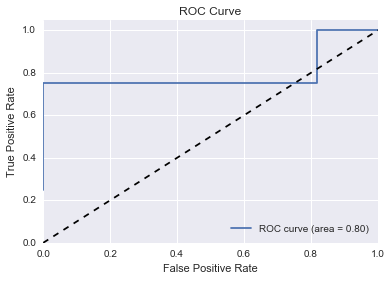

In [193]:
log_regression_catcher=LogisticRegression(penalty='l1')
log_regression_catcher.fit(X_train,y_train)


print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",log_regression_catcher.score(X_train,y_train)
t1=log_regression_catcher.predict(X_train)
t=log_regression_catcher.predict(X_test)
print "Model Accuracy(Test):",accuracy_score(y_test,t)

print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)


fpr, tpr, _ =metrics.roc_curve(y_test,log_regression_catcher.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [194]:
coeffecients1=DataFrame(zip(X_train.columns,log_regression_catcher.coef_.flatten()),columns=['Variable','Coeffecient'])
imp_coefficients=coeffecients1[coeffecients1.Coeffecient<>0]
imp_coefficients.sort_values(by='Coeffecient')

,Variable,Coeffecient
63,SB_FIE,-0.494463
11,Hutch Award_AW,0.059968
3,All-Star Game MVP_AW,0.310581
20,TSN All-Star_AW,0.499395


### Decision Tree

MODEL METRICS
-------------
Model Accuracy(Train): 1.0
Model Accuracy(Test): 0.666666666667
Confusion Matrix(Train):
[[9 0]
 [0 5]]
Confusion Matrix(Test):
[[10  1]
 [ 4  0]]
ROC AUC: 0.45


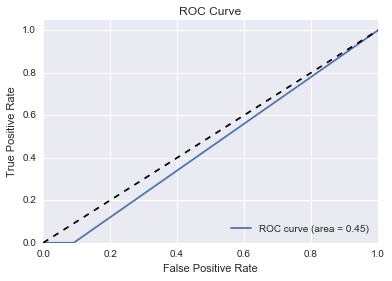

In [195]:
decision_tree_catcher=tree.DecisionTreeClassifier(criterion='gini',max_depth=20)
decision_tree_catcher.fit(X_train,y_train)

print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",decision_tree_catcher.score(X_train,y_train)
t1=decision_tree_catcher.predict(X_train)
t=decision_tree_catcher.predict(X_test)
print "Model Accuracy(Test):",accuracy_score(y_test,t)
print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)


fpr, tpr, _ =metrics.roc_curve(y_test,decision_tree_catcher.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [196]:
tree.export_graphviz(decision_tree_catcher,out_file='tree_catcher.dot',feature_names=X_train.columns) 
from sklearn.externals.six import StringIO  
import pydot
dot_data2 = StringIO() 
tree.export_graphviz(decision_tree_pitcher, out_file=dot_data2) 
graph = pydot.graph_from_dot_data(dot_data2.getvalue()) 

### Support Vector Machine

In [840]:
svm_catcher=svm.SVC()
svm_catcher.fit(X_train,y_train)
print svm_catcher.score(X_train,y_train)
predict=svm_catcher.predict(X_test)
print accuracy_score(predict,y_test)
print(y_train.value_counts())
print confusion_matrix(y_test,predict)
#print classification_report(y_test,predict)

1.0
0.888888888889
1    9
0    8
Name: inducted_HOF, dtype: int64
[[10  2]
 [ 0  6]]


### Naive Bayes

MODEL METRICS
-------------
Model Accuracy(Train): 0.882352941176
Model Accuracy(Test): 0.722222222222
Confusion Matrix(Train):
[[8 0]
 [2 7]]
Confusion Matrix(Test):
[[9 3]
 [2 4]]
ROC AUC: 0.71


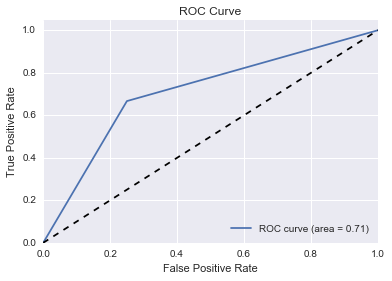

In [841]:
naive_bayes_catcher=GaussianNB()
naive_bayes_catcher.fit(X_train,y_train)

print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",naive_bayes_catcher.score(X_train,y_train)
t1=naive_bayes_catcher.predict(X_train)
t=naive_bayes_catcher.predict(X_test)
print "Model Accuracy(Test):",accuracy_score(y_test,t)
print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)

fpr, tpr, _ =metrics.roc_curve(y_test,naive_bayes_catcher.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Random Forests

MODEL METRICS
-------------
Model Accuracy(Train): 1.0
Model Accuracy(Test): 0.733333333333
Confusion Matrix(Train):
[[9 0]
 [0 5]]
Confusion Matrix(Test):
[[8 3]
 [1 3]]
ROC AUC: 0.88


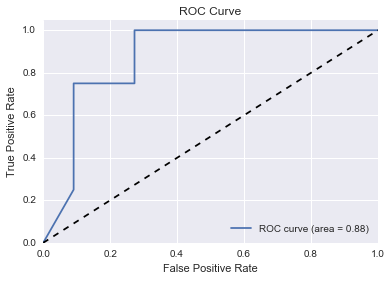

In [197]:
rf_catcher=RandomForestClassifier()
rf_catcher.fit(X_train,y_train)

print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",rf_catcher.score(X_train,y_train)
t1=rf_catcher.predict(X_train)
t=rf_catcher.predict(X_test)
print "Model Accuracy(Test):",accuracy_score(y_test,t)
print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)

fpr, tpr, _ =metrics.roc_curve(y_test,rf_catcher.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Gradient Boosting

MODEL METRICS
-------------
Model Accuracy(Train): 1.0
Model Accuracy(Test): 0.866666666667
Confusion Matrix(Train):
[[9 0]
 [0 5]]
Confusion Matrix(Test):
[[10  1]
 [ 1  3]]
ROC AUC: 0.80


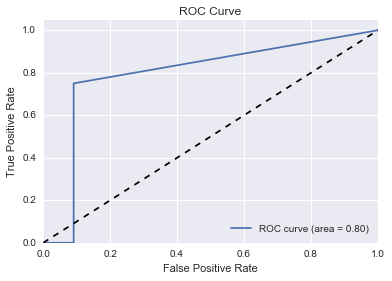

In [198]:
gbt_catcher=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)
gbt_catcher.fit(X_train,y_train)

print "MODEL METRICS"
print "-------------"
print "Model Accuracy(Train):",gbt_catcher.score(X_train,y_train)
t1=gbt_catcher.predict(X_train)
t=gbt_catcher.predict(X_test)
print "Model Accuracy(Test):",accuracy_score(y_test,t)
print "Confusion Matrix(Train):\n",confusion_matrix(y_train,t1)
print "Confusion Matrix(Test):\n",confusion_matrix(y_test,t)

fpr, tpr, _ =metrics.roc_curve(y_test,gbt_catcher.predict_proba(X_test)[:,[1]],)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()